In [1]:
# For example, here's several helpful packages to load

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,mean_squared_log_error
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn import set_config
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LassoCV,RidgeCV
from sklearn import metrics

from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, LassoLars, SGDRegressor, Ridge, LogisticRegression, BayesianRidge
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import KNNImputer
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor



import os
for dirname, _, filenames in os.walk('/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


# Zubair hasan

**Load data**

In [2]:
df_housePrice=pd.read_csv('input/house-prices-advanced-regression-techniques/train.csv')
df_housePrice_test = pd.read_csv('/input/house-prices-advanced-regression-techniques/test.csv')
test_ID = df_housePrice_test['Id'] 

_

* **check data type**

In [3]:

df_housePrice.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

* **converse all "object" data to numeric by using "get dummies"**

In [4]:
df_housePrice = pd.get_dummies(df_housePrice)
df_housePrice.dtypes

Id                         int64
MSSubClass                 int64
LotFrontage              float64
LotArea                    int64
OverallQual                int64
                          ...   
SaleCondition_AdjLand      uint8
SaleCondition_Alloca       uint8
SaleCondition_Family       uint8
SaleCondition_Normal       uint8
SaleCondition_Partial      uint8
Length: 290, dtype: object

* **check and clean data that have correlation less than 0.2 with "sale price"**

In [5]:
corr_feature = df_housePrice.corr()
corr_feature[corr_feature['SalePrice']>0.3].index

Index(['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Exterior1st_VinylSd',
       'Exterior2nd_VinylSd', 'MasVnrType_Stone', 'ExterQual_Ex',
       'ExterQual_Gd', 'Foundation_PConc', 'BsmtQual_Ex', 'BsmtExposure_Gd',
       'BsmtFinType1_GLQ', 'HeatingQC_Ex', 'KitchenQual_Ex', 'KitchenQual_Gd',
       'FireplaceQu_Gd', 'GarageType_Attchd', 'GarageFinish_Fin',
       'SaleType_New', 'SaleCondition_Partial'],
      dtype='object')

In [6]:
df_housePrice=df_housePrice[['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'SalePrice', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Exterior1st_VinylSd', 'Exterior2nd_VinylSd',
       'MasVnrType_Stone', 'ExterQual_Ex', 'ExterQual_Gd', 'Foundation_PConc',
       'BsmtQual_Ex', 'BsmtExposure_Gd', 'BsmtFinType1_GLQ', 'HeatingQC_Ex',
       'KitchenQual_Ex', 'KitchenQual_Gd', 'FireplaceQu_Gd',
       'GarageType_Attchd', 'GarageFinish_Fin', 'SaleType_New',
       'SaleCondition_Partial']]

* **check missing data**

In [7]:
total = df_housePrice.isnull().sum().sort_values(ascending=False)
percent = (df_housePrice.isnull().sum()/df_housePrice.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(25)

,Total,Percent
GarageYrBlt,81,0.055479
MasVnrArea,8,0.005479
OverallQual,0,0.000000
BsmtFinType1_GLQ,0,0.000000
MasVnrType_Stone,0,0.000000
ExterQual_Ex,0,0.000000
ExterQual_Gd,0,0.000000
Foundation_PConc,0,0.000000
BsmtQual_Ex,0,0.000000
BsmtExposure_Gd,0,0.000000


* **Check if "GarageYrBlt" have a high correlation with other feature**

In [8]:
corr_check = df_housePrice.corr()
corr_check[corr_check['GarageYrBlt']>0.8].index

Index(['YearBuilt', 'GarageYrBlt'], dtype='object')

In [9]:
print("Correlation: ", df_housePrice['GarageYrBlt'].corr(df_housePrice['YearBuilt']))

Correlation:  0.8256674841743414


* **Try to fill the missing value by using linear regression** (Lina)

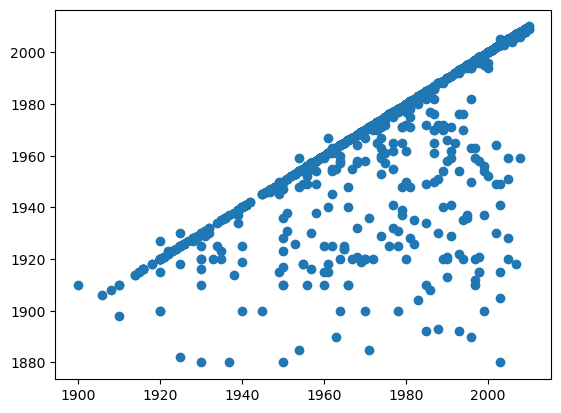

In [10]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
plt.scatter(x= 'GarageYrBlt', y='YearBuilt', data = df_housePrice)

In [11]:
df_missingVal = df_housePrice[['GarageYrBlt','YearBuilt']]
missingVal_clean = df_missingVal.dropna()
missingVal_clean

,GarageYrBlt,YearBuilt
0,2003.0,2003
1,1976.0,1976
2,2001.0,2001
3,1998.0,1915
4,2000.0,2000
...,...,...
1455,1999.0,1999
1456,1978.0,1978
1457,1941.0,1941
1458,1950.0,1950


* **Predict the missing values using linear regression**

In [12]:
y_pred = []
y_true = []
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
kf = KFold(n_splits=10)
for train_index, test_index in kf.split(missingVal_clean):
    df_test = missingVal_clean.iloc[test_index]
    df_train = missingVal_clean.iloc[train_index]

for train_index, test_index in kf.split(missingVal_clean):
    ...
    X_train = np.array(df_train['GarageYrBlt']).reshape(-1, 1)     
    y_train = np.array(df_train['YearBuilt']).reshape(-1, 1)
    X_test = np.array(df_test['GarageYrBlt']).reshape(-1, 1)  
    y_test = np.array(df_test['YearBuilt']).reshape(-1, 1)

for train_index, test_index in kf.split(missingVal_clean):
    ...
    model = LinearRegression()
    model.fit(X_train, y_train)

for train_index, test_index in kf.split(missingVal_clean):
    ...
    y_pred.append(model.predict(X_test)[0])
    y_true.append(y_test[0])
print("Mean Square Error: ", mean_squared_error(y_true, y_pred))

Mean Square Error:  9.299560130742583


In [13]:
missing_values = df_housePrice['GarageYrBlt'].isnull()
X = df_housePrice[missing_values]['YearBuilt'].values.reshape(-1, 1)
predicted = model.predict(X)
df_housePrice.loc[missing_values, 'GarageYrBlt'] = predicted

* **Check again for nall values**

In [14]:
total = df_housePrice.isnull().sum().sort_values(ascending=False)
percent = (df_housePrice.isnull().sum()/df_housePrice.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(25)

,Total,Percent
MasVnrArea,8,0.005479
OverallQual,0,0.000000
BsmtFinType1_GLQ,0,0.000000
Exterior2nd_VinylSd,0,0.000000
MasVnrType_Stone,0,0.000000
ExterQual_Ex,0,0.000000
ExterQual_Gd,0,0.000000
Foundation_PConc,0,0.000000
BsmtQual_Ex,0,0.000000
BsmtExposure_Gd,0,0.000000


* **Check if we have a high correlation again**

In [15]:
corr_check = df_housePrice.corr()
corr_check[corr_check['MasVnrArea']>0.5].index

Index(['MasVnrArea'], dtype='object')

* **Fill the missing value with mean values**

In [16]:
mean = df_housePrice['MasVnrArea'].mean()
df_housePrice['MasVnrArea'].fillna(mean, inplace=True)

In [17]:
total = df_housePrice.isnull().sum().sort_values(ascending=False)
percent = (df_housePrice.isnull().sum()/df_housePrice.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(25)

,Total,Percent
OverallQual,0,0.0
Neighborhood_NridgHt,0,0.0
Exterior2nd_VinylSd,0,0.0
MasVnrType_Stone,0,0.0
ExterQual_Ex,0,0.0
ExterQual_Gd,0,0.0
Foundation_PConc,0,0.0
BsmtQual_Ex,0,0.0
BsmtExposure_Gd,0,0.0
BsmtFinType1_GLQ,0,0.0


In [18]:
df_housePrice

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,...,BsmtExposure_Gd,BsmtFinType1_GLQ,HeatingQC_Ex,KitchenQual_Ex,KitchenQual_Gd,FireplaceQu_Gd,GarageType_Attchd,GarageFinish_Fin,SaleType_New,SaleCondition_Partial
0,7,2003,2003,196.0,706,856,856,854,1710,2,...,0,1,1,0,1,0,1,0,0,0
1,6,1976,1976,0.0,978,1262,1262,0,1262,2,...,1,0,1,0,0,0,1,0,0,0
2,7,2001,2002,162.0,486,920,920,866,1786,2,...,0,1,1,0,1,0,1,0,0,0
3,7,1915,1970,0.0,216,756,961,756,1717,1,...,0,0,0,0,1,1,0,0,0,0
4,8,2000,2000,350.0,655,1145,1145,1053,2198,2,...,0,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1999,2000,0.0,0,953,953,694,1647,2,...,0,0,1,0,0,0,1,0,0,0
1456,6,1978,1988,119.0,790,1542,2073,0,2073,2,...,0,0,0,0,0,0,1,0,0,0
1457,7,1941,2006,0.0,275,1152,1188,1152,2340,2,...,0,1,1,0,1,1,1,0,0,0
1458,5,1950,1996,0.0,49,1078,1078,0,1078,1,...,0,1,0,0,1,0,1,0,0,0


In [19]:
df_housePrice.dtypes

OverallQual                int64
YearBuilt                  int64
YearRemodAdd               int64
MasVnrArea               float64
BsmtFinSF1                 int64
TotalBsmtSF                int64
1stFlrSF                   int64
2ndFlrSF                   int64
GrLivArea                  int64
FullBath                   int64
TotRmsAbvGrd               int64
Fireplaces                 int64
GarageYrBlt              float64
GarageCars                 int64
GarageArea                 int64
WoodDeckSF                 int64
OpenPorchSF                int64
SalePrice                  int64
Neighborhood_NoRidge       uint8
Neighborhood_NridgHt       uint8
Exterior1st_VinylSd        uint8
Exterior2nd_VinylSd        uint8
MasVnrType_Stone           uint8
ExterQual_Ex               uint8
ExterQual_Gd               uint8
Foundation_PConc           uint8
BsmtQual_Ex                uint8
BsmtExposure_Gd            uint8
BsmtFinType1_GLQ           uint8
HeatingQC_Ex               uint8
KitchenQua

# Visualization of data 

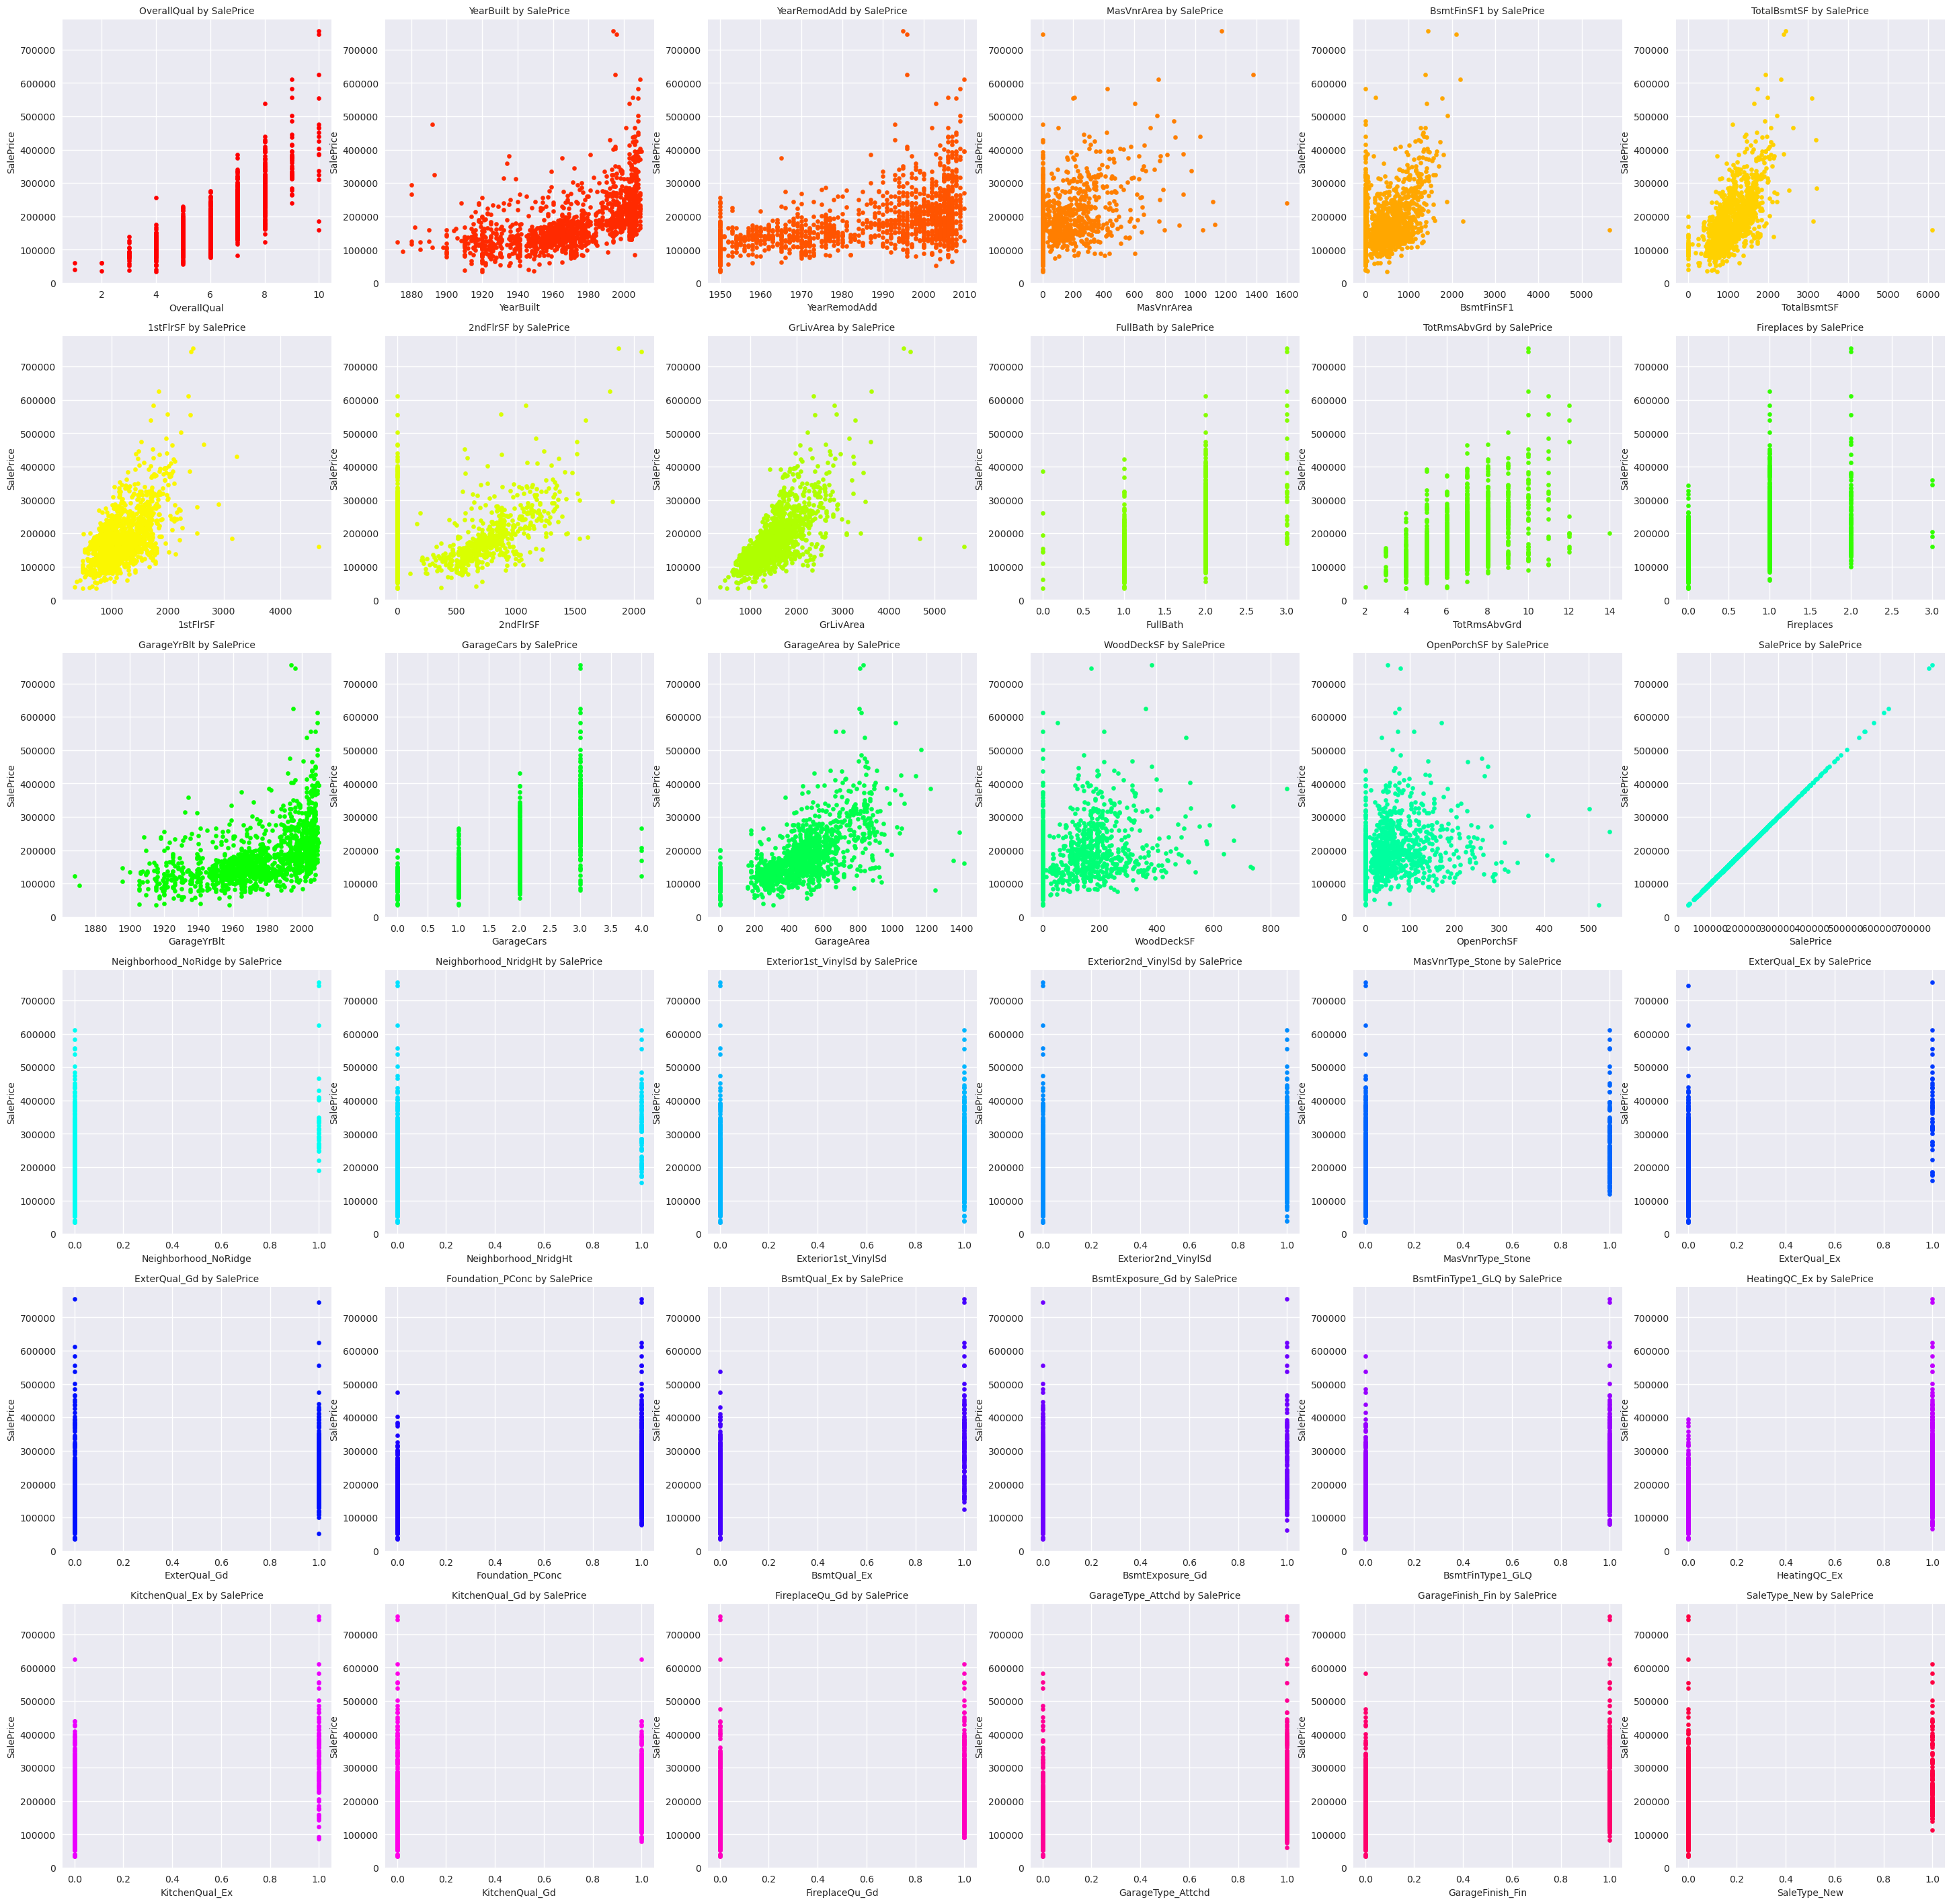

In [20]:
import plotly.express as px
import sklearn
import math
from plotly.subplots import make_subplots
def get_cmap(n, name='hsv'):
    return plt.cm.get_cmap(name, n)

# plot target values by each feature
def plot_target_values_by_each_feature(df, target_column_name):
    nrows = math.ceil(math.sqrt(len(df.columns)-1))
    ncols = math.ceil((len(df.columns)-1)/nrows)
    plt.style.use('seaborn')
    fig, axes = plt.subplots(nrows, ncols)
    plt.subplots_adjust(top=5, bottom=0, left=0, right=3.5)
    colors = get_cmap(len(df.columns))

    counter = 0
    for i in range(len(df.columns)-1):
        df.plot(kind='scatter', x=df.columns[i], y=target_column_name, title=f'{df.columns[i]} by {target_column_name}', ax=axes[i//nrows, i%nrows], color=colors(i))
        axes[i//nrows, i%nrows].tick_params(axis='both', labelsize=10)
        axes[i//nrows, i%nrows].xaxis.label.set_size(10)
        axes[i//nrows, i%nrows].yaxis.label.set_size(10)
        axes[i//nrows, i%nrows].title.set_fontsize(10)

    for i in range(len(df.columns)-1, nrows*ncols):
        fig.delaxes(axes.flatten()[i])

plot_target_values_by_each_feature(df_housePrice, 'SalePrice')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  after removing the cwd from sys.path.


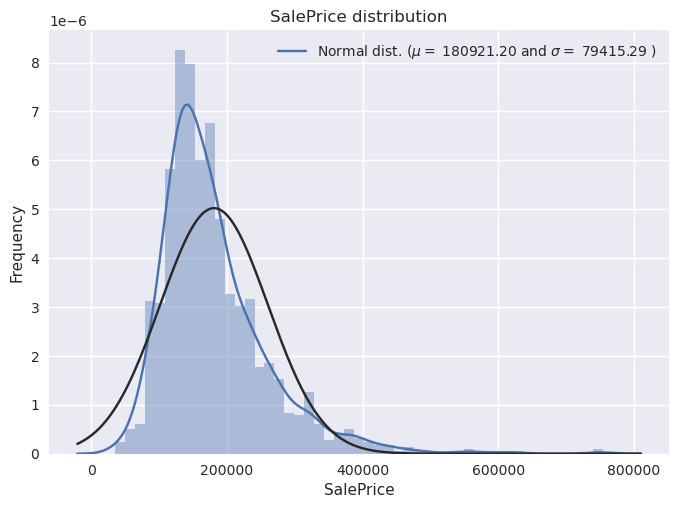

<Figure size 800x550 with 0 Axes>

In [21]:
import seaborn as sns 
from scipy.stats import norm, skew
from scipy import stats
sns.distplot(df_housePrice['SalePrice'] , fit=norm);

(mu, sigma) = norm.fit(df_housePrice['SalePrice'])
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')
fig = plt.figure()

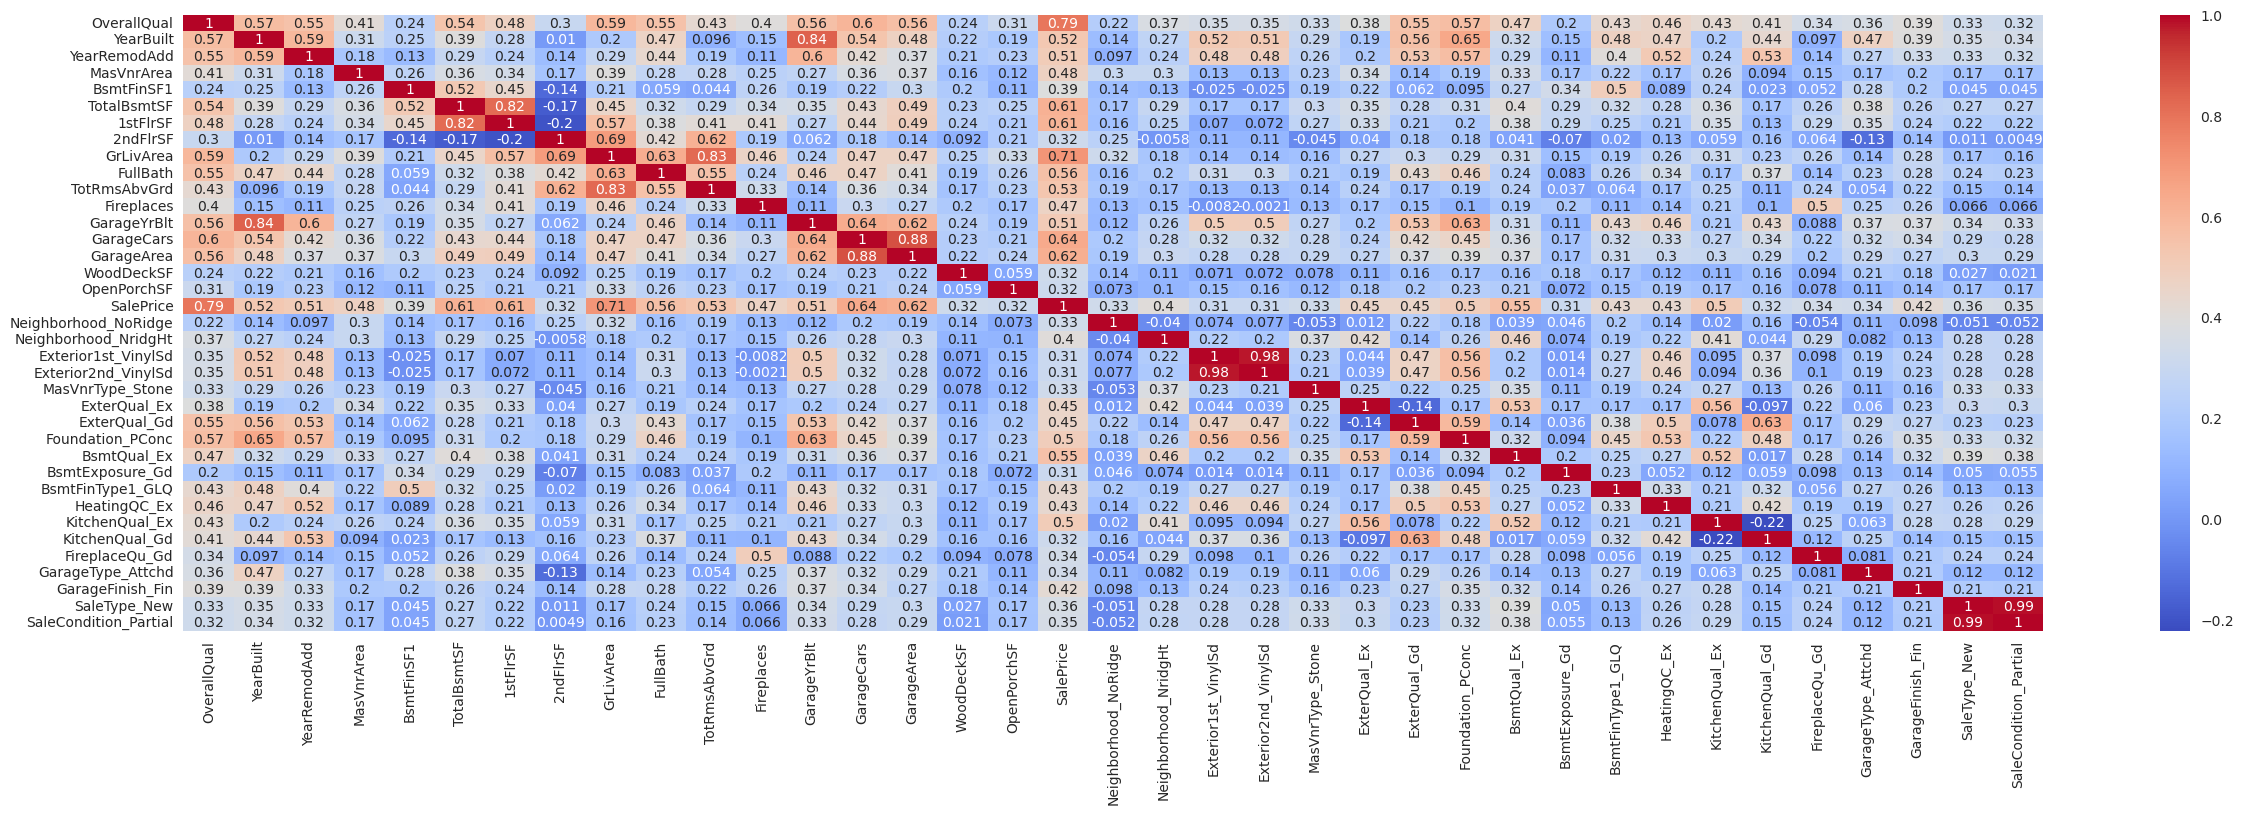

In [22]:
plt.figure(figsize=(30,8))
sns.heatmap(df_housePrice.corr(),cmap='coolwarm',annot = True)
plt.show()

# Preparing the test data

In [23]:
df_housePrice_test = pd.get_dummies(df_housePrice_test)
df_housePrice_test

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,0,0,0,1,0,0,0,0,1,0
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,0,0,0,1,0,0,0,0,1,0
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,0,0,0,1,0,0,0,0,1,0
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,0,0,0,1,0,0,0,0,1,0
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,21.0,1936,4,7,1970,1970,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1455,2916,160,21.0,1894,4,5,1970,1970,0.0,252.0,...,0,0,0,1,1,0,0,0,0,0
1456,2917,20,160.0,20000,5,7,1960,1996,0.0,1224.0,...,0,0,0,1,1,0,0,0,0,0
1457,2918,85,62.0,10441,5,5,1992,1992,0.0,337.0,...,0,0,0,1,0,0,0,0,1,0


In [24]:
df_housePrice_test=df_housePrice_test[['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF',  'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Exterior1st_VinylSd', 'Exterior2nd_VinylSd',
       'MasVnrType_Stone', 'ExterQual_Ex', 'ExterQual_Gd', 'Foundation_PConc',
       'BsmtQual_Ex', 'BsmtExposure_Gd', 'BsmtFinType1_GLQ', 'HeatingQC_Ex',
       'KitchenQual_Ex', 'KitchenQual_Gd', 'FireplaceQu_Gd',
       'GarageType_Attchd', 'GarageFinish_Fin', 'SaleType_New',
       'SaleCondition_Partial']]

In [25]:
total = df_housePrice_test.isnull().sum().sort_values(ascending=False)
percent = (df_housePrice_test.isnull().sum()/df_housePrice_test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(25)

,Total,Percent
GarageYrBlt,78,0.053461
MasVnrArea,15,0.010281
BsmtFinSF1,1,0.000685
TotalBsmtSF,1,0.000685
GarageArea,1,0.000685
GarageCars,1,0.000685
OverallQual,0,0.000000
ExterQual_Gd,0,0.000000
Foundation_PConc,0,0.000000
BsmtQual_Ex,0,0.000000


In [26]:
df_missingVal = df_housePrice_test[['GarageYrBlt','YearBuilt']]
missingVal_clean = df_missingVal.dropna()
missingVal_clean

y_pred = []
y_true = []
kf = KFold(n_splits=10)
for train_index, test_index in kf.split(missingVal_clean):
    df_test = missingVal_clean.iloc[test_index]
    df_train = missingVal_clean.iloc[train_index]

for train_index, test_index in kf.split(missingVal_clean):
    ...
    X_train = np.array(df_train['GarageYrBlt']).reshape(-1, 1)     
    y_train = np.array(df_train['YearBuilt']).reshape(-1, 1)
    X_test = np.array(df_test['GarageYrBlt']).reshape(-1, 1)  
    y_test = np.array(df_test['YearBuilt']).reshape(-1, 1)

for train_index, test_index in kf.split(missingVal_clean):
    ...
    model = LinearRegression()
    model.fit(X_train, y_train)

for train_index, test_index in kf.split(missingVal_clean):
    ...
    y_pred.append(model.predict(X_test)[0])
    y_true.append(y_test[0])
    
missing_values = df_housePrice_test['GarageYrBlt'].isnull()
X = df_housePrice_test[missing_values]['YearBuilt'].values.reshape(-1, 1)
predicted = model.predict(X)
df_housePrice_test.loc[missing_values, 'GarageYrBlt'] = predicted

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [27]:
mean = df_housePrice_test['MasVnrArea'].mean()
df_housePrice_test['MasVnrArea'].fillna(mean, inplace=True)


mean = df_housePrice_test['GarageCars'].mean()
df_housePrice_test['GarageCars'].fillna(mean, inplace=True)

mean = df_housePrice_test['TotalBsmtSF'].mean()
df_housePrice_test['TotalBsmtSF'].fillna(mean, inplace=True)

mean = df_housePrice_test['BsmtFinSF1'].mean()
df_housePrice_test['BsmtFinSF1'].fillna(mean, inplace=True)

mean = df_housePrice_test['GarageArea'].mean()
df_housePrice_test['GarageArea'].fillna(mean, inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [28]:
total = df_housePrice_test.isnull().sum().sort_values(ascending=False)
percent = (df_housePrice_test.isnull().sum()/df_housePrice_test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(25)

,Total,Percent
OverallQual,0,0.0
YearBuilt,0,0.0
Exterior2nd_VinylSd,0,0.0
MasVnrType_Stone,0,0.0
ExterQual_Ex,0,0.0
ExterQual_Gd,0,0.0
Foundation_PConc,0,0.0
BsmtQual_Ex,0,0.0
BsmtExposure_Gd,0,0.0
BsmtFinType1_GLQ,0,0.0


# Lina - check different models

**split test train**

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_housePrice.drop('SalePrice', axis=1), df_housePrice['SalePrice'], test_size=0.2, random_state=101)

from sklearn.preprocessing import StandardScaler

**Linear regression**

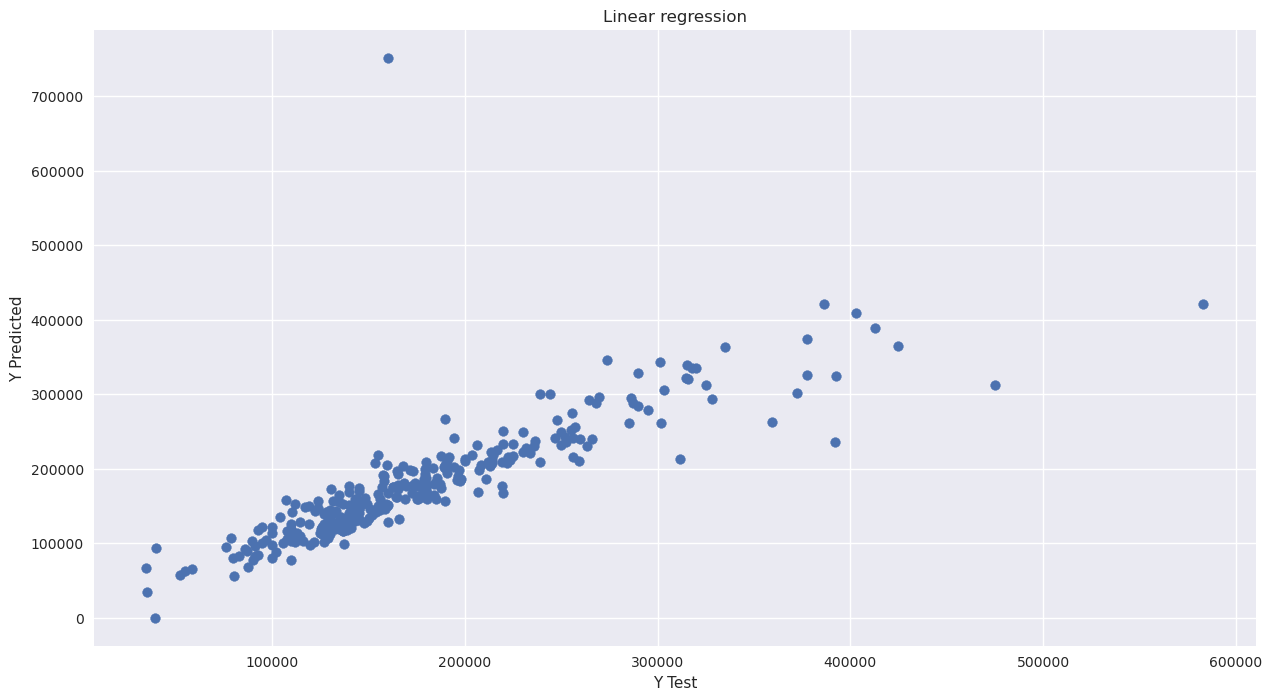

MAE: 20677.069072761984
MSE: 2008102360.2948582
RMSE: 44811.85513114647


In [30]:
from sklearn import linear_model
import sklearn.metrics as metrics
from sklearn import metrics
NE_reg = linear_model.LinearRegression().fit(X_train,y_train)
predict = NE_reg.predict(X_test)
predict= predict.reshape(-1,1)
MAE_LR= metrics.mean_absolute_error(y_test, predict)
MSE_LR= metrics.mean_squared_error(y_test, predict)
plt.figure(figsize=(15,8))
plt.scatter(y_test,predict)
plt.xlabel('Y Test')
plt.ylabel('Y Predicted')
plt.title('Linear regression')
plt.show()

print('MAE:', MAE_LR)
print('MSE:', MSE_LR)
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predict)))

**Ridge regression**

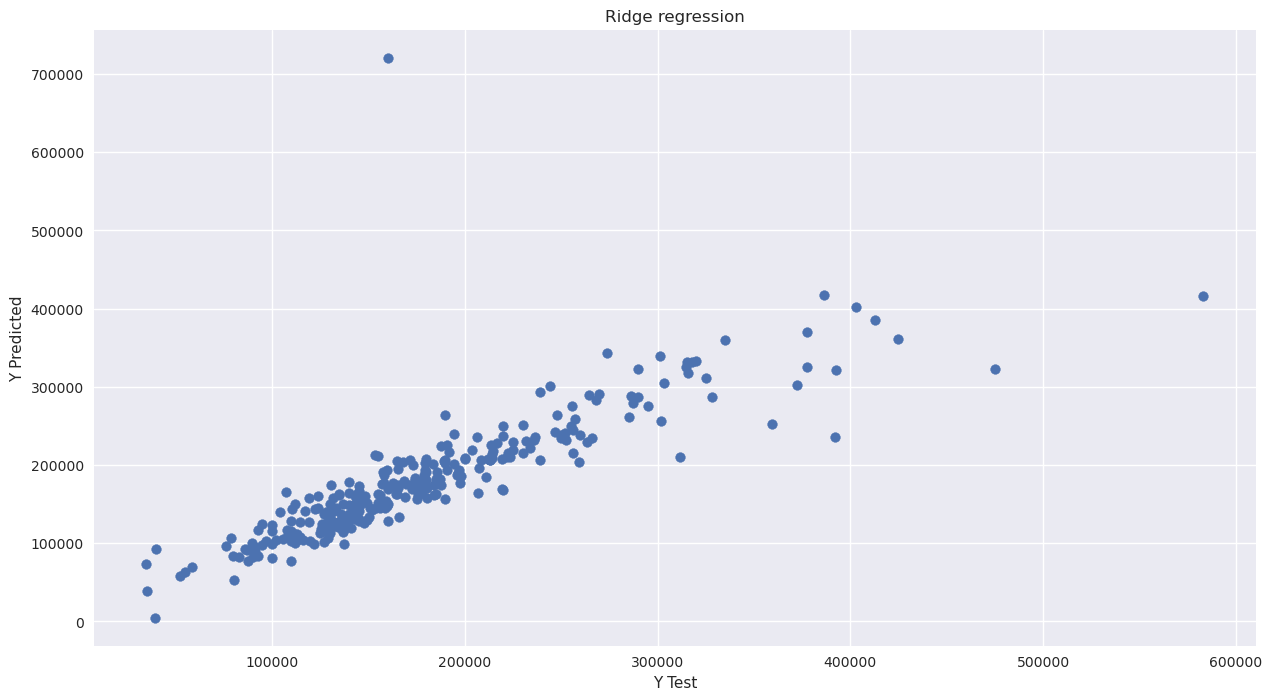

MAE: 20644.593538619254
MSE: 1900902059.4392827
RMSE: 43599.3355389653


In [31]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
alphas = np.logspace(-5, 5, 100)
regressor = Ridge()
scores = [cross_val_score(regressor.set_params(alpha=alpha), X_train, y_train, cv=5, scoring='neg_mean_squared_error').mean() for alpha in alphas]
best_alpha = alphas[np.argmax(scores)]
regressor.set_params(alpha=best_alpha)
regressor.fit(X_train, y_train)
y_pred_Ridge = regressor.predict(X_test)
MAE_Ridge= metrics.mean_absolute_error(y_test, y_pred_Ridge)
MSE_Ridge= metrics.mean_squared_error(y_test, y_pred_Ridge)

plt.figure(figsize=(15,8))
plt.scatter(y_test,y_pred_Ridge)
plt.xlabel('Y Test')
plt.ylabel('Y Predicted')
plt.title('Ridge regression')
plt.show()

print('MAE:', MAE_Ridge)
print('MSE:', MSE_Ridge)
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_Ridge)))

**Gradient Boosting Regressor**

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,


MAE: 17661.93402737969
MSE: 771712175.0196173
RMSE: 27779.70797218029


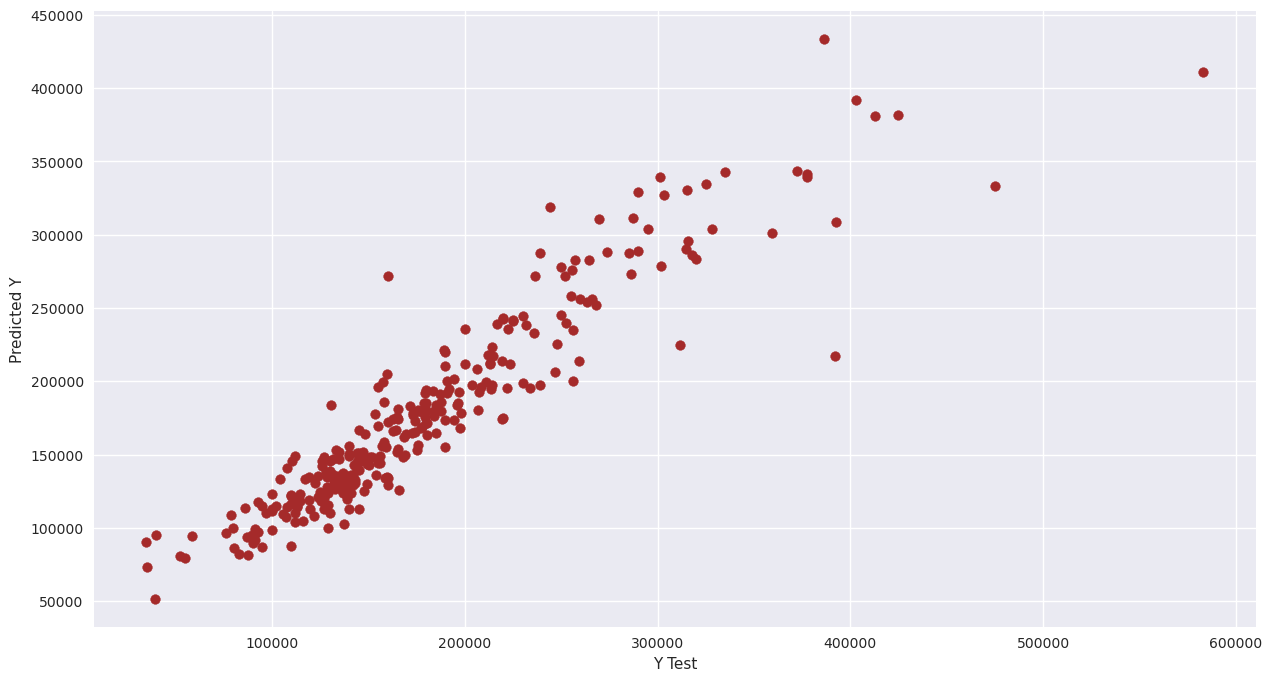

In [32]:
from sklearn import ensemble
from sklearn.utils import shuffle
from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor

params = {'n_estimators': 210, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.09, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)
clf.fit(X_train, y_train)
clf_pred=clf.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, clf_pred))
print('MSE:', metrics.mean_squared_error(y_test, clf_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, clf_pred)))

plt.figure(figsize=(15,8))
plt.scatter(y_test,clf_pred, c= 'brown')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

**Try to improve by using Bagging**

MAE: 18186.29519307571
MSE: 867976849.5799471
RMSE: 29461.44683446397


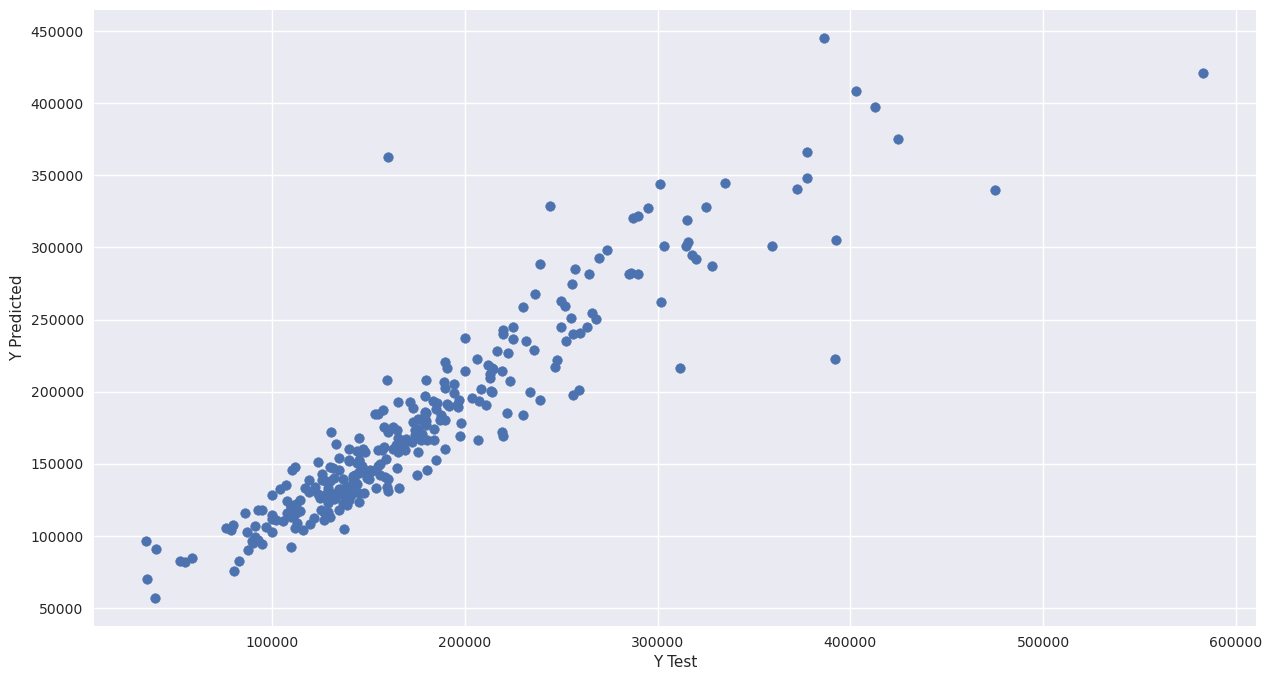

In [33]:
gbr = GradientBoostingRegressor(random_state=0)
bagging_gbr = BaggingRegressor(gbr, n_estimators=10, random_state=0)
bagging_gbr.fit(X_train, y_train)
predictions = bagging_gbr.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
plt.figure(figsize=(15,8))
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Y Predicted')
plt.title('')
plt.show()

**The best model is Gradient Boosting Regressor- now lets try to improve it**

I want to try to clean the data differently, we have numeric and categorical data, I want to try and work only with the numeric data (categorical probably better for classification data)

In [34]:
df_housePrice2=pd.read_csv('/input/house-prices-advanced-regression-techniques/train.csv')

In [35]:
object_columns = df_housePrice2.select_dtypes(['object']).columns
df_housePrice2 = df_housePrice2.drop(columns=object_columns)

In [36]:
df_housePrice2

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


**missing data**

In [37]:
total = df_housePrice2.isnull().sum().sort_values(ascending=False)
percent = (df_housePrice2.isnull().sum()/df_housePrice2.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(25)

,Total,Percent
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
MasVnrArea,8,0.005479
Id,0,0.000000
OpenPorchSF,0,0.000000
KitchenAbvGr,0,0.000000
TotRmsAbvGrd,0,0.000000
Fireplaces,0,0.000000
GarageCars,0,0.000000
GarageArea,0,0.000000


In [38]:
df_missingVal = df_housePrice2[['GarageYrBlt','YearBuilt']]
missingVal_clean = df_missingVal.dropna()
missingVal_clean

y_pred = []
y_true = []
kf = KFold(n_splits=10)
for train_index, test_index in kf.split(missingVal_clean):
    df_test = missingVal_clean.iloc[test_index]
    df_train = missingVal_clean.iloc[train_index]

for train_index, test_index in kf.split(missingVal_clean):
    ...
    X_train = np.array(df_train['GarageYrBlt']).reshape(-1, 1)     
    y_train = np.array(df_train['YearBuilt']).reshape(-1, 1)
    X_test = np.array(df_test['GarageYrBlt']).reshape(-1, 1)  
    y_test = np.array(df_test['YearBuilt']).reshape(-1, 1)

for train_index, test_index in kf.split(missingVal_clean):
    ...
    model = LinearRegression()
    model.fit(X_train, y_train)

for train_index, test_index in kf.split(missingVal_clean):
    ...
    y_pred.append(model.predict(X_test)[0])
    y_true.append(y_test[0])
    
missing_values = df_housePrice2['GarageYrBlt'].isnull()
X = df_housePrice2[missing_values]['YearBuilt'].values.reshape(-1, 1)
predicted = model.predict(X)
df_housePrice2.loc[missing_values, 'GarageYrBlt'] = predicted

In [39]:
total = df_housePrice2.isnull().sum().sort_values(ascending=False)
percent = (df_housePrice2.isnull().sum()/df_housePrice2.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(40)

,Total,Percent
LotFrontage,259,0.177397
MasVnrArea,8,0.005479
Id,0,0.000000
OpenPorchSF,0,0.000000
KitchenAbvGr,0,0.000000
TotRmsAbvGrd,0,0.000000
Fireplaces,0,0.000000
GarageYrBlt,0,0.000000
GarageCars,0,0.000000
GarageArea,0,0.000000


In [40]:
mean = df_housePrice2['MasVnrArea'].mean()
df_housePrice2['MasVnrArea'].fillna(mean, inplace=True)
df_housePrice2 = df_housePrice2.drop('LotFrontage', axis=1)
df_housePrice2 = df_housePrice2.drop('Id', axis=1)

In [41]:
df_housePrice2

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,8450,7,5,2003,2003,196.0,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,20,9600,6,8,1976,1976,0.0,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,60,11250,7,5,2001,2002,162.0,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500
3,70,9550,7,5,1915,1970,0.0,216,0,540,...,0,35,272,0,0,0,0,2,2006,140000
4,60,14260,8,5,2000,2000,350.0,655,0,490,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,7917,6,5,1999,2000,0.0,0,0,953,...,0,40,0,0,0,0,0,8,2007,175000
1456,20,13175,6,6,1978,1988,119.0,790,163,589,...,349,0,0,0,0,0,0,2,2010,210000
1457,70,9042,7,9,1941,2006,0.0,275,0,877,...,0,60,0,0,0,0,2500,5,2010,266500
1458,20,9717,5,6,1950,1996,0.0,49,1029,0,...,366,0,112,0,0,0,0,4,2010,142125


In [42]:
X = df_housePrice2.drop('SalePrice', axis=1)
y = df_housePrice2['SalePrice']

**feature selection**

In [43]:
selected_features = []
remaining_features = list(X.columns)
best_MSE = np.inf

while remaining_features and best_MSE > 0:
    MSE_list = []
    for feature in remaining_features:
        model = LinearRegression()
        model.fit(X[selected_features + [feature]], y)
        y_pred = model.predict(X[selected_features + [feature]])
        MSE = mean_squared_error(y, y_pred)
        MSE_list.append(MSE)


    best_feature = remaining_features[np.argmin(MSE_list)]


    if MSE_list[np.argmin(MSE_list)] < best_MSE:
        best_MSE = MSE_list[np.argmin(MSE_list)]
        selected_features.append(best_feature)
        remaining_features.remove(best_feature)
    else:
        break


print("Selected Features:", selected_features)

Selected Features: ['OverallQual', 'GrLivArea', 'BsmtFinSF1', 'GarageCars', 'MSSubClass', 'YearBuilt', 'BedroomAbvGr', 'OverallCond', 'LotArea', 'MasVnrArea', 'BsmtFullBath', 'TotRmsAbvGrd', 'WoodDeckSF', 'ScreenPorch', 'TotalBsmtSF', 'YearRemodAdd', 'KitchenAbvGr', 'Fireplaces', 'FullBath', 'PoolArea', 'GarageYrBlt', 'YrSold', 'LowQualFinSF', 'HalfBath', 'EnclosedPorch', '3SsnPorch', 'BsmtHalfBath', 'MiscVal', 'BsmtFinSF2', 'MoSold', 'GarageArea', 'OpenPorchSF', '2ndFlrSF', '1stFlrSF', 'BsmtUnfSF']


**apply feature selection**

In [44]:
df_housePrice2=df_housePrice2[['OverallQual', 'GrLivArea', 'BsmtFinSF1', 'GarageCars', 'MSSubClass', 'YearBuilt', 'BedroomAbvGr', 'OverallCond', 'LotArea', 'MasVnrArea', 'BsmtFullBath', 'TotRmsAbvGrd', 'WoodDeckSF', 'ScreenPorch', 'TotalBsmtSF', 'YearRemodAdd', 'KitchenAbvGr', 'Fireplaces', 'FullBath', 'PoolArea', 'GarageYrBlt', 'YrSold', 'LowQualFinSF', 'HalfBath', 'EnclosedPorch', '3SsnPorch',  'BsmtHalfBath', 'MiscVal', 'BsmtFinSF2', 'GarageArea', 'MoSold', 'OpenPorchSF', '2ndFlrSF','SalePrice']]

In [45]:
df_housePrice2

,OverallQual,GrLivArea,BsmtFinSF1,GarageCars,MSSubClass,YearBuilt,BedroomAbvGr,OverallCond,LotArea,MasVnrArea,...,EnclosedPorch,3SsnPorch,BsmtHalfBath,MiscVal,BsmtFinSF2,GarageArea,MoSold,OpenPorchSF,2ndFlrSF,SalePrice
0,7,1710,706,2,60,2003,3,5,8450,196.0,...,0,0,0,0,0,548,2,61,854,208500
1,6,1262,978,2,20,1976,3,8,9600,0.0,...,0,0,1,0,0,460,5,0,0,181500
2,7,1786,486,2,60,2001,3,5,11250,162.0,...,0,0,0,0,0,608,9,42,866,223500
3,7,1717,216,3,70,1915,3,5,9550,0.0,...,272,0,0,0,0,642,2,35,756,140000
4,8,2198,655,3,60,2000,4,5,14260,350.0,...,0,0,0,0,0,836,12,84,1053,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1647,0,2,60,1999,3,5,7917,0.0,...,0,0,0,0,0,460,8,40,694,175000
1456,6,2073,790,2,20,1978,3,6,13175,119.0,...,0,0,0,0,163,500,2,0,0,210000
1457,7,2340,275,1,70,1941,4,9,9042,0.0,...,0,0,0,2500,0,252,5,60,1152,266500
1458,5,1078,49,1,20,1950,2,6,9717,0.0,...,112,0,0,0,1029,240,4,0,0,142125


**try gradient boosting again**

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,


MAE: 16080.065964595546
MSE: 705524725.6439285
RMSE: 26561.715412298367


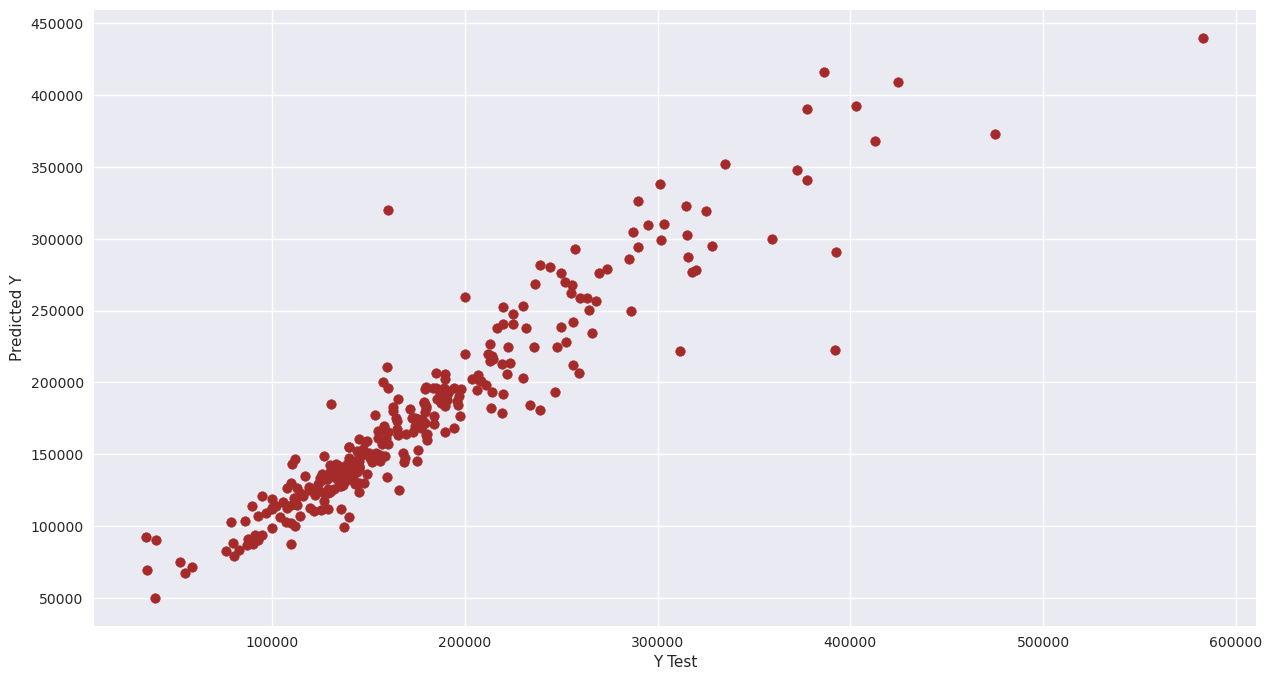

In [46]:
X_train, X_test, y_train, y_test = train_test_split(df_housePrice2.drop('SalePrice', axis=1), df_housePrice2['SalePrice'], test_size=0.2, random_state=101)
params = {'n_estimators': 210, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.09, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)

clf_pred=clf.predict(X_test)
#clf_pred= clf_pred.reshape(-1,1)

print('MAE:', metrics.mean_absolute_error(y_test, clf_pred))
print('MSE:', metrics.mean_squared_error(y_test, clf_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, clf_pred)))

plt.figure(figsize=(15,8))
plt.scatter(y_test,clf_pred, c= 'brown')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

We can see that we achieve a minor improvement :)

**Apply the model on the test data**

In [47]:
df_housePrice_test2 = pd.read_csv('/input/house-prices-advanced-regression-techniques/test.csv')
object_columns = df_housePrice_test2.select_dtypes(['object']).columns
df_housePrice_test2 = df_housePrice_test2.drop(columns=object_columns)
df_housePrice_test2 = df_housePrice_test2.drop('Id', axis=1)
df_housePrice_test2

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,730.0,140,0,0,0,120,0,0,6,2010
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,312.0,393,36,0,0,0,0,12500,6,2010
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,482.0,212,34,0,0,0,0,0,3,2010
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,470.0,360,36,0,0,0,0,0,6,2010
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,506.0,0,82,0,0,144,0,0,1,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,6,2006
1455,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,...,286.0,0,24,0,0,0,0,0,4,2006
1456,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,...,576.0,474,0,0,0,0,0,0,9,2006
1457,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,...,0.0,80,32,0,0,0,0,700,7,2006


In [48]:
total = df_housePrice_test2.isnull().sum().sort_values(ascending=False)
percent = (df_housePrice_test2.isnull().sum()/df_housePrice_test2.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(25)

,Total,Percent
LotFrontage,227,0.155586
GarageYrBlt,78,0.053461
MasVnrArea,15,0.010281
BsmtHalfBath,2,0.001371
BsmtFullBath,2,0.001371
TotalBsmtSF,1,0.000685
GarageCars,1,0.000685
BsmtFinSF1,1,0.000685
BsmtFinSF2,1,0.000685
BsmtUnfSF,1,0.000685


**fix missing data**

In [49]:
df_missingVal = df_housePrice_test2[['GarageYrBlt','YearBuilt']]
missingVal_clean = df_missingVal.dropna()
missingVal_clean

y_pred = []
y_true = []
kf = KFold(n_splits=10)
for train_index, test_index in kf.split(missingVal_clean):
    df_test = missingVal_clean.iloc[test_index]
    df_train = missingVal_clean.iloc[train_index]

for train_index, test_index in kf.split(missingVal_clean):
    ...
    X_train = np.array(df_train['GarageYrBlt']).reshape(-1, 1)     
    y_train = np.array(df_train['YearBuilt']).reshape(-1, 1)
    X_test = np.array(df_test['GarageYrBlt']).reshape(-1, 1)  
    y_test = np.array(df_test['YearBuilt']).reshape(-1, 1)

for train_index, test_index in kf.split(missingVal_clean):
    ...
    model = LinearRegression()
    model.fit(X_train, y_train)

for train_index, test_index in kf.split(missingVal_clean):
    ...
    y_pred.append(model.predict(X_test)[0])
    y_true.append(y_test[0])
    
missing_values = df_housePrice_test2['GarageYrBlt'].isnull()
X = df_housePrice_test2[missing_values]['YearBuilt'].values.reshape(-1, 1)
predicted = model.predict(X)
df_housePrice_test2.loc[missing_values, 'GarageYrBlt'] = predicted

In [50]:
df_housePrice_test2 = df_housePrice_test2.drop('LotFrontage', axis=1)

mean = df_housePrice_test2['MasVnrArea'].mean()
df_housePrice_test2['MasVnrArea'].fillna(mean, inplace=True)

mean = df_housePrice_test2['BsmtHalfBath'].mean()
df_housePrice_test2['BsmtHalfBath'].fillna(mean, inplace=True)

mean = df_housePrice_test2['BsmtFullBath'].mean()
df_housePrice_test2['BsmtFullBath'].fillna(mean, inplace=True)

mean = df_housePrice_test2['GarageCars'].mean()
df_housePrice_test2['GarageCars'].fillna(mean, inplace=True)

mean = df_housePrice_test2['TotalBsmtSF'].mean()
df_housePrice_test2['TotalBsmtSF'].fillna(mean, inplace=True)

mean = df_housePrice_test2['BsmtFinSF1'].mean()
df_housePrice_test2['BsmtFinSF1'].fillna(mean, inplace=True)

mean = df_housePrice_test2['BsmtFinSF2'].mean()
df_housePrice_test2['BsmtFinSF2'].fillna(mean, inplace=True)

mean = df_housePrice_test2['BsmtUnfSF'].mean()
df_housePrice_test2['BsmtUnfSF'].fillna(mean, inplace=True)

mean = df_housePrice_test2['GarageArea'].mean()
df_housePrice_test2['GarageArea'].fillna(mean, inplace=True)

df_housePrice_test2

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,20,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,...,730.0,140,0,0,0,120,0,0,6,2010
1,20,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,...,312.0,393,36,0,0,0,0,12500,6,2010
2,60,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,...,482.0,212,34,0,0,0,0,0,3,2010
3,60,9978,6,6,1998,1998,20.0,602.0,0.0,324.0,...,470.0,360,36,0,0,0,0,0,6,2010
4,120,5005,8,5,1992,1992,0.0,263.0,0.0,1017.0,...,506.0,0,82,0,0,144,0,0,1,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,1936,4,7,1970,1970,0.0,0.0,0.0,546.0,...,0.0,0,0,0,0,0,0,0,6,2006
1455,160,1894,4,5,1970,1970,0.0,252.0,0.0,294.0,...,286.0,0,24,0,0,0,0,0,4,2006
1456,20,20000,5,7,1960,1996,0.0,1224.0,0.0,0.0,...,576.0,474,0,0,0,0,0,0,9,2006
1457,85,10441,5,5,1992,1992,0.0,337.0,0.0,575.0,...,0.0,80,32,0,0,0,0,700,7,2006


In [51]:
df_housePrice_test2=df_housePrice_test2[['OverallQual', 'GrLivArea', 'BsmtFinSF1', 'GarageCars', 'MSSubClass', 'YearBuilt', 'BedroomAbvGr', 'OverallCond', 'LotArea', 'MasVnrArea', 'BsmtFullBath', 'TotRmsAbvGrd', 'WoodDeckSF', 'ScreenPorch', 'TotalBsmtSF', 'YearRemodAdd', 'KitchenAbvGr', 'Fireplaces', 'FullBath', 'PoolArea', 'GarageYrBlt', 'YrSold', 'LowQualFinSF', 'HalfBath', 'EnclosedPorch', '3SsnPorch',  'BsmtHalfBath', 'MiscVal', 'BsmtFinSF2', 'GarageArea', 'MoSold', 'OpenPorchSF', '2ndFlrSF']]

In [52]:
clf_pred2=clf.predict(df_housePrice_test2)
sub = pd.DataFrame() 
sub['Id'] = test_ID   
sub['SalePrice'] = clf_pred2
sub.to_csv('submission.csv',index=False) #submission file
sub.head()

,Id,SalePrice
0,1461,129453.249540
1,1462,161095.400986
2,1463,183603.253431
3,1464,190016.281325
4,1465,194755.660771


**Lina best Score: 0.14029**

# Ilana - check different models

In [53]:
features = df_housePrice.drop('SalePrice',axis=1)
target = df_housePrice['SalePrice']

In [54]:
target_log=np.log(target)

**Split to create train set and validation set**


In [55]:
X=features
X_train, X_test, y_train, y_test = train_test_split(X, target_log, test_size=0.3, random_state=42)

In [56]:
print("X_train Shape: ",X_train.shape)
print("X_test Shape: ",X_test.shape)
print("y_train Shape: ",y_train.shape)
print("y_test Shape: ",y_test.shape)

X_train Shape:  (1022, 36)
X_test Shape:  (438, 36)
y_train Shape:  (1022,)
y_test Shape:  (438,)


**Standardization**

In [57]:
xStandardScaler = StandardScaler()
yStandardScaler = StandardScaler()
X_train = xStandardScaler.fit_transform(X_train)
X_test = xStandardScaler.transform(X_test)
y_train = yStandardScaler.fit_transform(y_train.ravel().reshape(-1, 1))
y_test = yStandardScaler.transform(y_test.ravel().reshape(-1, 1))

**Model Comparing List**

In [58]:
model_compare = list()

**Lasso Linear Regression**

In [59]:
alphas = np.linspace(0,.1,num=21)
lgLasso = LassoCV(cv=10,alphas=alphas)
lgLasso.fit(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 73.8853990572527, tolerance: 0.0911603277593675
  positive,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordin

LassoCV(alphas=array([0.   , 0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 ,
       0.045, 0.05 , 0.055, 0.06 , 0.065, 0.07 , 0.075, 0.08 , 0.085,
       0.09 , 0.095, 0.1  ]),
        cv=10)

In [60]:
print(lgLasso.alpha_)

0.005


**Top Feature Importance**

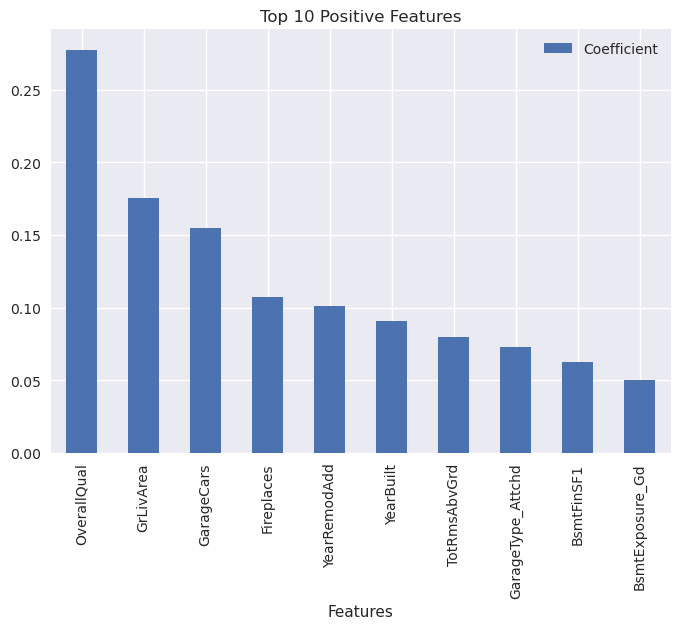

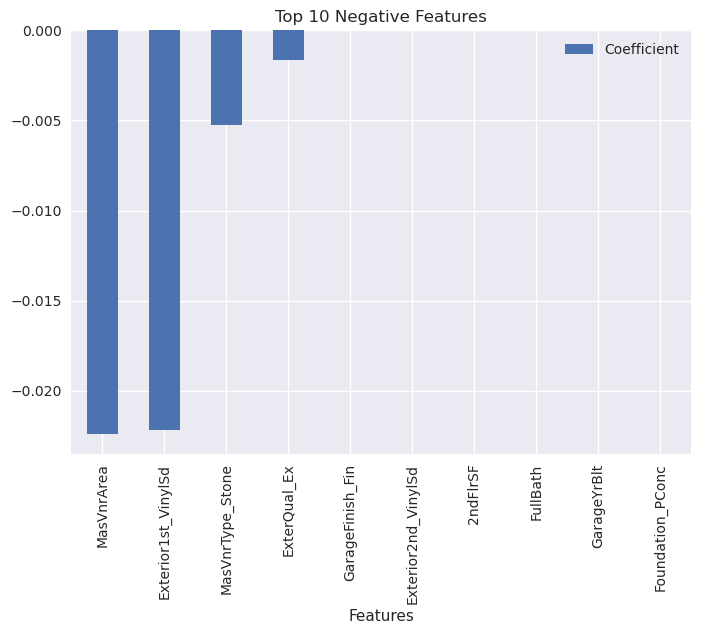

In [61]:
coeff_df = pd.DataFrame(lgLasso.coef_.T,X.columns,columns=['Coefficient'])

coeff_df.sort_values(by='Coefficient',ascending=False).head(10).plot(kind='bar')
plt.xlabel('Features');
plt.title('Top 10 Positive Features');

coeff_df.sort_values(by='Coefficient').head(10).plot(kind='bar',)
plt.xlabel('Features');
plt.title('Top 10 Negative Features');

**Predict**

In [62]:
predictLinear_lasso = lgLasso.predict(X_test).reshape(-1, 1)

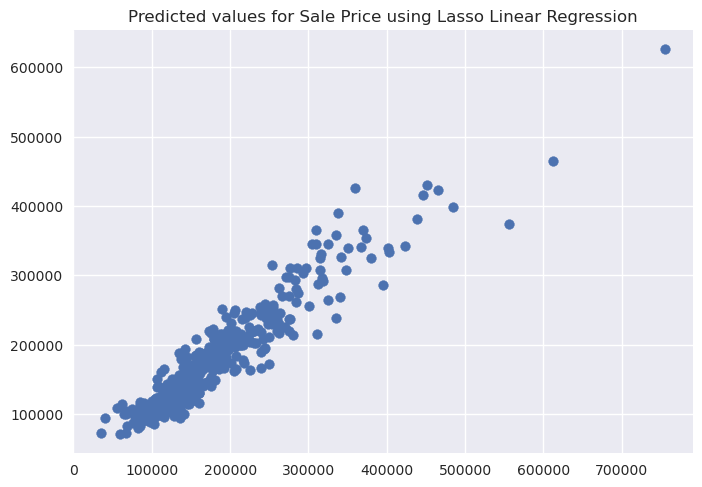

In [63]:
target_lasso=np.exp(yStandardScaler.inverse_transform(y_test))
predicted_lasso=np.exp(yStandardScaler.inverse_transform(predictLinear_lasso))
plt.scatter(target_lasso,predicted_lasso);
plt.title("Predicted values for Sale Price using Lasso Linear Regression");

**Residual Plot**

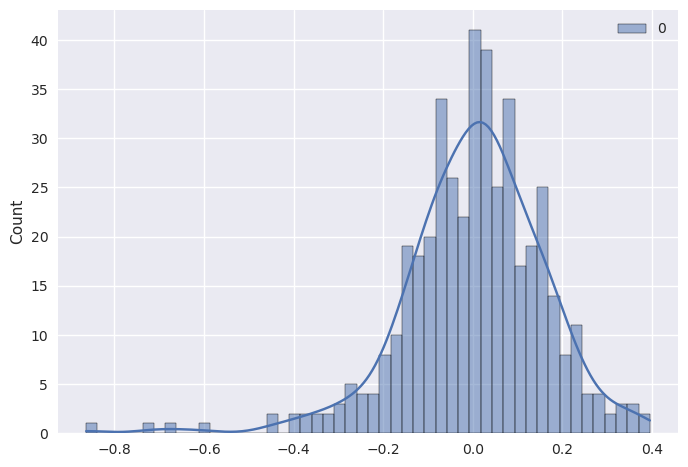

In [64]:
sns.histplot((yStandardScaler.inverse_transform(y_test)-yStandardScaler.inverse_transform(predictLinear_lasso)),kde=True,bins=50);

**Model effectiveness**

In [65]:
def evaluate_model(name,y_test,predictions):
    model_eval = dict()
    model_eval['Name'] = name
    model_eval['MAE'] = metrics.mean_absolute_error(np.exp(yStandardScaler.inverse_transform(y_test)), np.exp(yStandardScaler.inverse_transform(predictions)))
    model_eval['MSE'] = metrics.mean_squared_error(np.exp(yStandardScaler.inverse_transform(y_test)), np.exp(yStandardScaler.inverse_transform(predictions)))
    model_eval['RMSE'] = np.sqrt(metrics.mean_squared_error(np.exp(yStandardScaler.inverse_transform(y_test)), np.exp(yStandardScaler.inverse_transform(predictions))))
    
    print('MAE:', model_eval['MAE'])
    print('MSE:', model_eval['MSE'])
    print('RMSE:',model_eval['RMSE'])
    
    model_compare.append(model_eval)

In [66]:
evaluate_model('Lasso',y_test,predictLinear_lasso)

MAE: 19956.858422048008
MSE: 819209389.4413203
RMSE: 28621.83413831686


**Ridge Linear Regression**

In [67]:
alphas = np.linspace(0,20,num=21)
lgRidge = RidgeCV(cv=10,alphas=alphas)
lgRidge.fit(X_train,y_train)

RidgeCV(alphas=array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20.]),
        cv=10)

In [68]:
print(lgRidge.alpha_)

20.0


**Top Feature Importance**

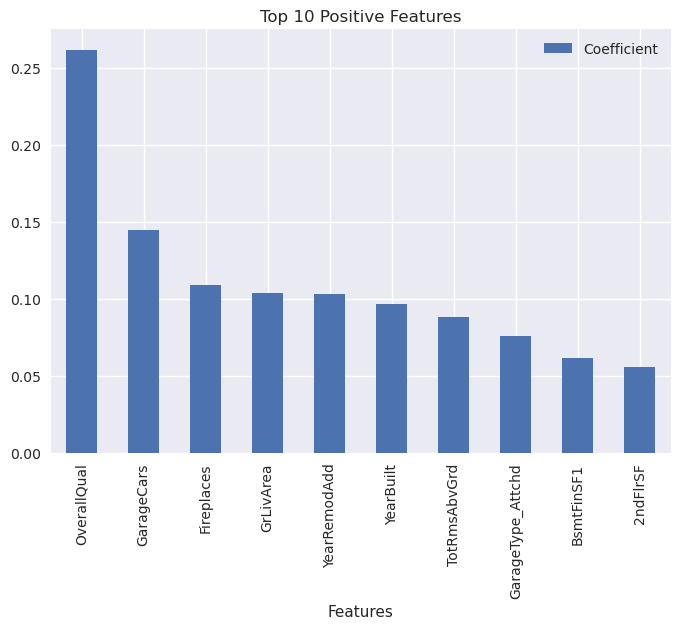

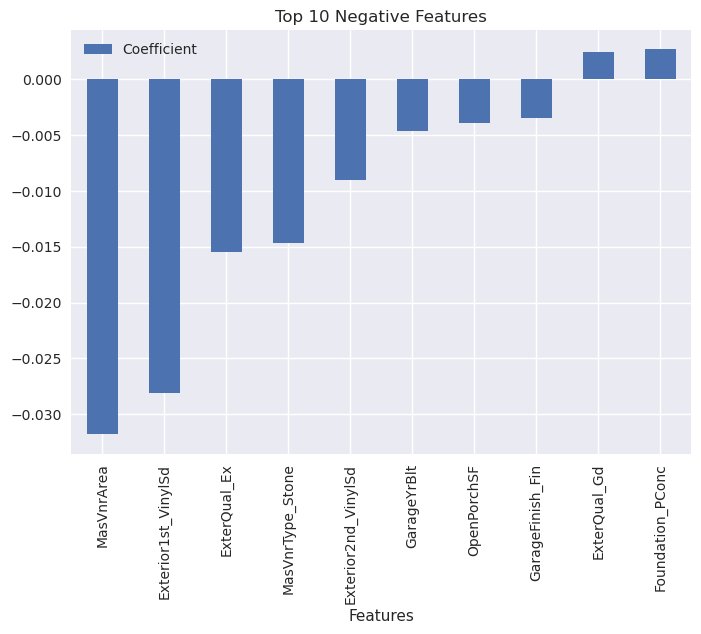

In [69]:
coeff_df = pd.DataFrame(lgRidge.coef_.T,X.columns,columns=['Coefficient'])

coeff_df.sort_values(by='Coefficient',ascending=False).head(10).plot(kind='bar')
plt.xlabel('Features');
plt.title('Top 10 Positive Features');

coeff_df.sort_values(by='Coefficient').head(10).plot(kind='bar')
plt.xlabel('Features');
plt.title('Top 10 Negative Features');

**Predict**

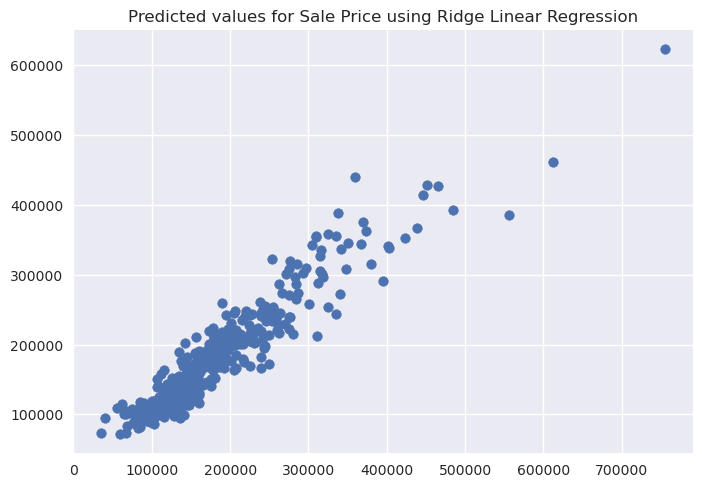

In [70]:
predictLinear_ridge = lgRidge.predict(X_test)
target_ridge=np.exp(yStandardScaler.inverse_transform(y_test))
predicted_ridge=np.exp(yStandardScaler.inverse_transform(predictLinear_ridge))
plt.scatter(target_ridge,predicted_ridge);
plt.title("Predicted values for Sale Price using Ridge Linear Regression");

**Residual Plot**

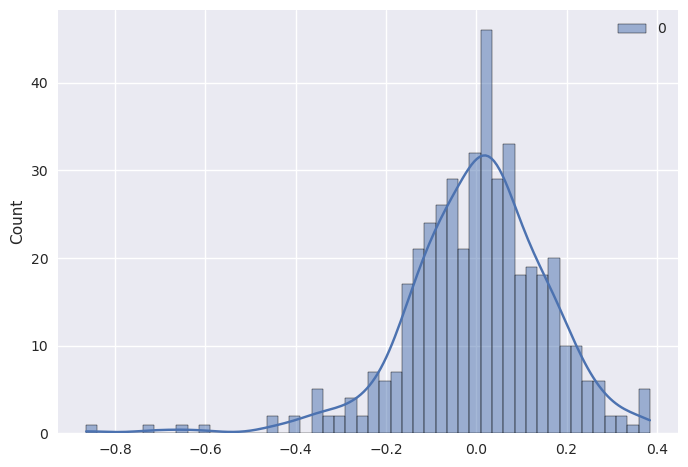

In [71]:
sns.histplot((yStandardScaler.inverse_transform(y_test)-yStandardScaler.inverse_transform(predictLinear_ridge)),kde=True,bins=50);

**Model effectiveness**

In [72]:
evaluate_model('Ridge',y_test,predictLinear_ridge)

MAE: 20061.104842193472
MSE: 829000719.2398
RMSE: 28792.372587888618


**Random Forest Regressor**

In [73]:
X_train.shape

(1022, 36)

In [74]:
rfr = RandomForestRegressor(n_estimators=2500)
parameters = {'min_samples_split': [2],'max_depth': [8],'min_samples_leaf' :[2],'max_samples': [.7]}
rfr_grid = GridSearchCV(rfr,parameters,cv = 2)
rfr_grid.fit(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=2, estimator=RandomForestRegressor(n_estimators=2500),
             param_grid={'max_depth': [8], 'max_samples': [0.7],
                         'min_samples_leaf': [2], 'min_samples_split': [2]})

In [75]:
print(rfr_grid.best_score_)
print(rfr_grid.best_params_)

0.8363415642020988
{'max_depth': 8, 'max_samples': 0.7, 'min_samples_leaf': 2, 'min_samples_split': 2}


**Top Feature Importance**

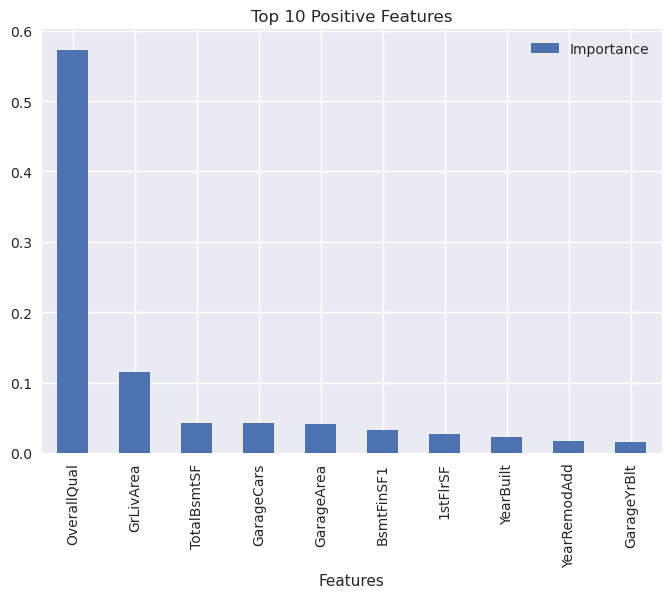

In [76]:
coeff_df = pd.DataFrame(rfr_grid.best_estimator_.feature_importances_,X.columns,columns=['Importance'])

coeff_df.sort_values(by='Importance',ascending=False).head(10).plot(kind='bar')
plt.xlabel('Features');
plt.title('Top 10 Positive Features');

**Predict**

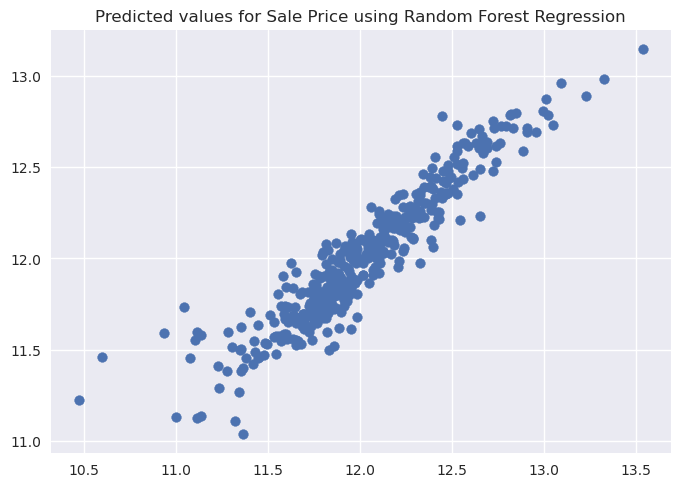

In [77]:
predictForest = rfr_grid.best_estimator_.predict(X_test).reshape(-1, 1)
target_forest=yStandardScaler.inverse_transform(y_test)
predicted_forest=yStandardScaler.inverse_transform(predictForest)
plt.scatter(target_forest,predicted_forest);
plt.title("Predicted values for Sale Price using Random Forest Regression");

**Residual Plot**

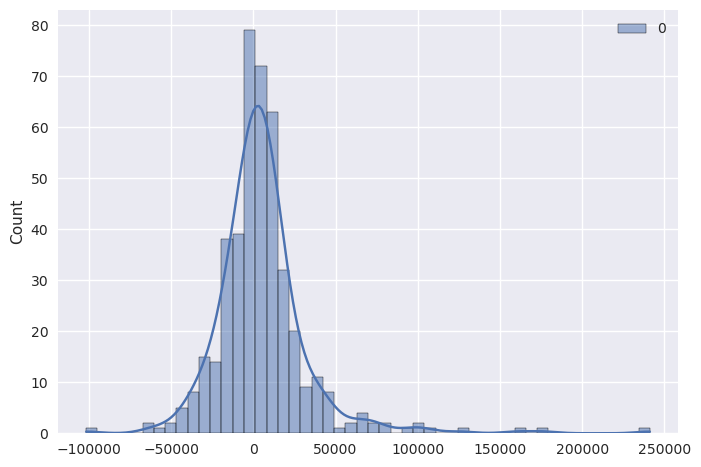

In [78]:
sns.histplot((np.exp(yStandardScaler.inverse_transform(y_test))-np.exp(yStandardScaler.inverse_transform(predictForest))),kde=True, bins=50);

In [79]:
evaluate_model('Random Forest',y_test,predictForest)

MAE: 17814.649473294157
MSE: 857816563.397326
RMSE: 29288.505653196546


**Boosting: XGBoost Regressor**

In [80]:
xgb = XGBRegressor()
parameters = {'objective':['reg:squarederror'],
            'learning_rate': [.1],
              'max_depth': [3],
              'min_child_weight': [2],
              'subsample': [0.7],
              'colsample_bytree': [.7],
              'colsample_bylevel':[.7],
              'alpha' : [.05],
              'lambda' : [.3],
              'n_estimators': [2500]}

In [81]:
xgb_grid = GridSearchCV(xgb,parameters,cv = 2)
xgb_grid.fit(X_train,y_train)

GridSearchCV(cv=2,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat...
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None,
                               

In [82]:
print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

0.8437744801559245
{'alpha': 0.05, 'colsample_bylevel': 0.7, 'colsample_bytree': 0.7, 'lambda': 0.3, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 2, 'n_estimators': 2500, 'objective': 'reg:squarederror', 'subsample': 0.7}


**Top Feature Importance**

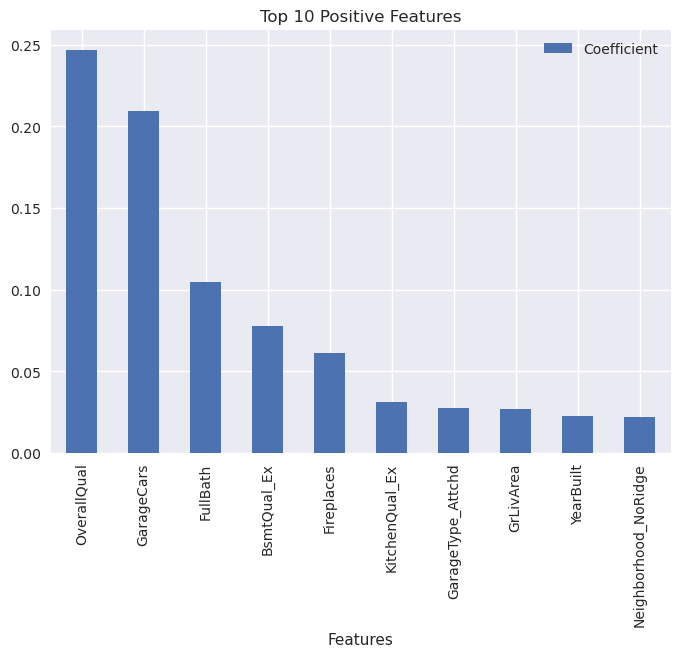

In [83]:
coeff_df = pd.DataFrame(xgb_grid.best_estimator_.feature_importances_,X.columns,columns=['Coefficient'])

coeff_df.sort_values(by='Coefficient',ascending=False).head(10).plot(kind='bar')
plt.xlabel('Features');
plt.title('Top 10 Positive Features');

**Predict**

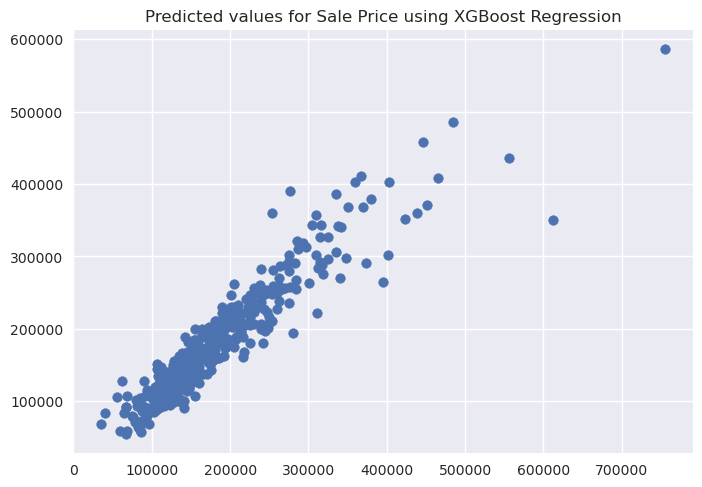

In [84]:
predictLinear_xgb = xgb_grid.predict(X_test).reshape(-1,1)
target_xgb=np.exp(yStandardScaler.inverse_transform(y_test))
predicted_xgb=np.exp(yStandardScaler.inverse_transform(predictLinear_xgb))
plt.scatter(target_xgb,predicted_xgb);
plt.title("Predicted values for Sale Price using XGBoost Regression");

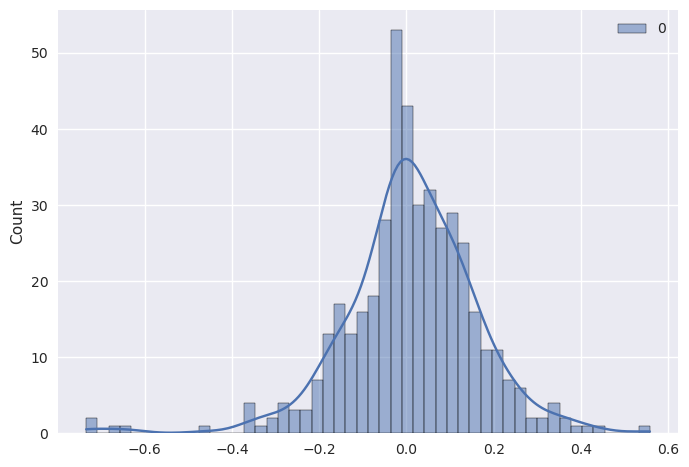

In [85]:
sns.histplot((yStandardScaler.inverse_transform(y_test)-yStandardScaler.inverse_transform(predictLinear_xgb)),kde=True,bins=50);

In [86]:
evaluate_model('XG Boost',y_test,predictLinear_xgb)

MAE: 18952.61166702341
MSE: 884982410.0129715
RMSE: 29748.653919345183


**Model Comparision**

In [87]:
df_models = pd.DataFrame(model_compare)
df_models.head()

,Name,MAE,MSE,RMSE
0,Lasso,19956.858422,8.192094e+08,28621.834138
1,Ridge,20061.104842,8.290007e+08,28792.372588
2,Random Forest,17814.649473,8.578166e+08,29288.505653
3,XG Boost,18952.611667,8.849824e+08,29748.653919


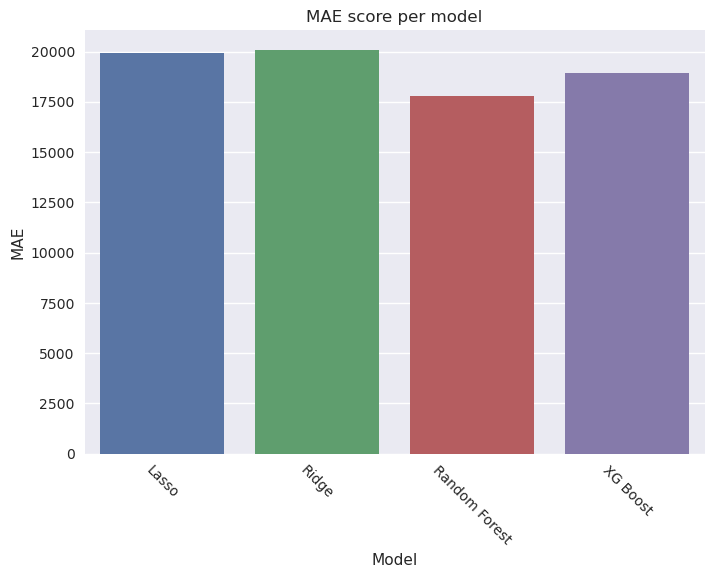

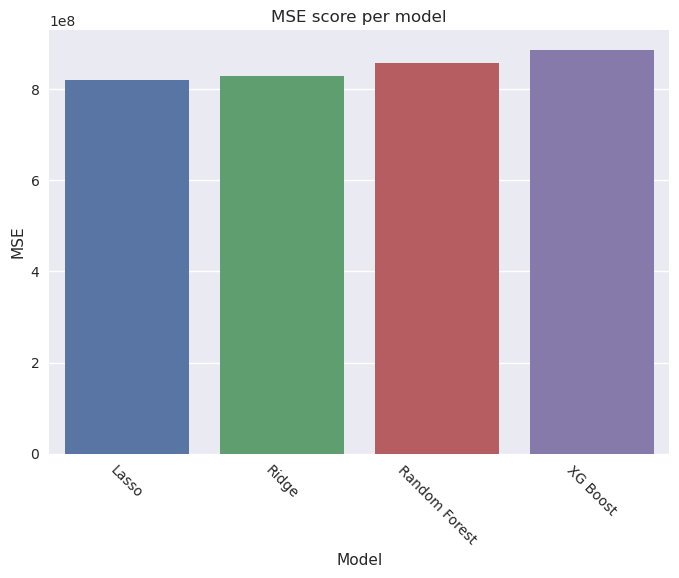

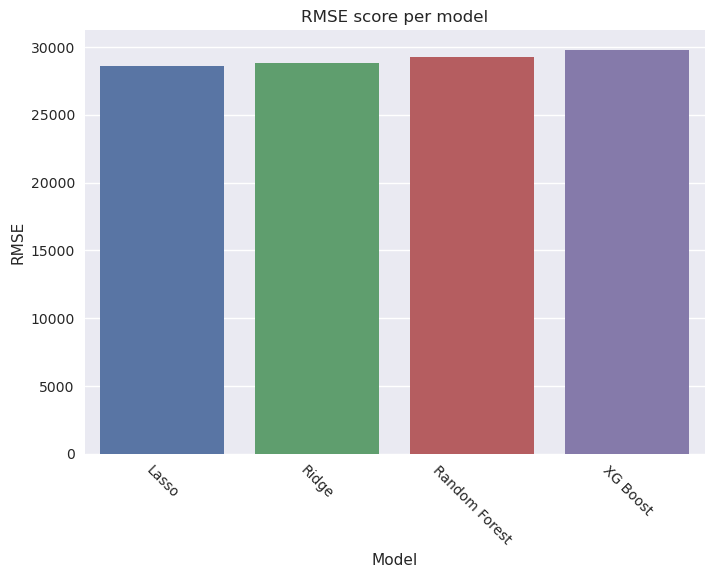

In [88]:
for i in df_models.columns[1:]:
    sns.barplot(x='Name',y=i,data=df_models)
    plt.xlabel('Model')
    plt.xticks(rotation=-45)
    plt.title(f'{i} score per model')
    plt.show()

**check the score for LASSO in test data**

In [89]:
X_testData = xStandardScaler.fit_transform(df_housePrice_test)

In [90]:
predictLinear_lasso = lgLasso.predict(X_testData).reshape(-1, 1)
predicted_lasso=np.exp(yStandardScaler.inverse_transform(predictLinear_lasso))
sub = pd.DataFrame() 
sub['Id'] = test_ID   
sub['SalePrice'] = predicted_lasso
sub.to_csv('submission.csv',index=False) #submission file
sub.head()

,Id,SalePrice
0,1461,115833.326115
1,1462,145462.952806
2,1463,174169.144324
3,1464,206614.562747
4,1465,192482.432521


**SCORE : 0.13968**

# Lets try to ensemble model

In [91]:
prediction= (0.8*clf_pred2)+(0.2*predicted_lasso[:,0])

In [92]:
sub = pd.DataFrame() 
sub['Id'] = test_ID   
sub['SalePrice'] = prediction
sub.to_csv('submission.csv',index=False) #submission file
sub.head()

,Id,SalePrice
0,1461,126729.264855
1,1462,157968.911350
2,1463,181716.431609
3,1464,193335.937609
4,1465,194301.015121


**SCORE: 0.13793**

by ensembling we manage to achieve better result!

# Lets try to clean some outiers from the data 

In [93]:
features = df_housePrice.drop('SalePrice',axis=1)
target = df_housePrice['SalePrice']
target_log=np.log(target)

In [94]:
X=features
X_train, X_test, y_train, y_test = train_test_split(X, target_log, test_size=0.3, random_state=42)

In [95]:
xStandardScaler = StandardScaler()
yStandardScaler = StandardScaler()
X_train = xStandardScaler.fit_transform(X_train)
X_test = xStandardScaler.transform(X_test)
y_train = yStandardScaler.fit_transform(y_train.ravel().reshape(-1, 1))
y_test = yStandardScaler.transform(y_test.ravel().reshape(-1, 1))

In [96]:
alphas = np.linspace(0,.1,num=21)
lgLasso = LassoCV(cv=10,alphas=alphas)
lgLasso.fit(X_train,y_train)



/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 73.8853990572527, tolerance: 0.0911603277593675
  positive,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordin

LassoCV(alphas=array([0.   , 0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 ,
       0.045, 0.05 , 0.055, 0.06 , 0.065, 0.07 , 0.075, 0.08 , 0.085,
       0.09 , 0.095, 0.1  ]),
        cv=10)

In [97]:
predictLinear_lasso = lgLasso.predict(X_test).reshape(-1, 1)



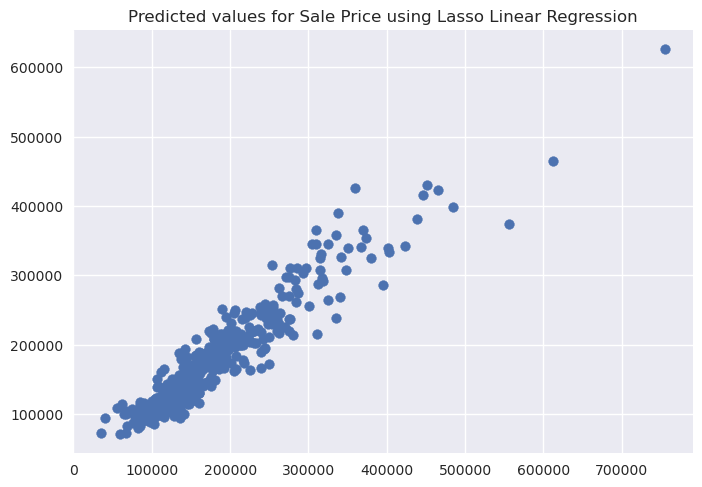

In [98]:
target_lasso=np.exp(yStandardScaler.inverse_transform(y_test))
predicted_lasso=np.exp(yStandardScaler.inverse_transform(predictLinear_lasso))
plt.scatter(target_lasso,predicted_lasso);
plt.title("Predicted values for Sale Price using Lasso Linear Regression");


In [99]:
evaluate_model('Lasso',y_test,predictLinear_lasso)

MAE: 19956.858422048008
MSE: 819209389.4413203
RMSE: 28621.83413831686


**GrLivArea is very corellative with Sale price, lets try to handle some outliers**

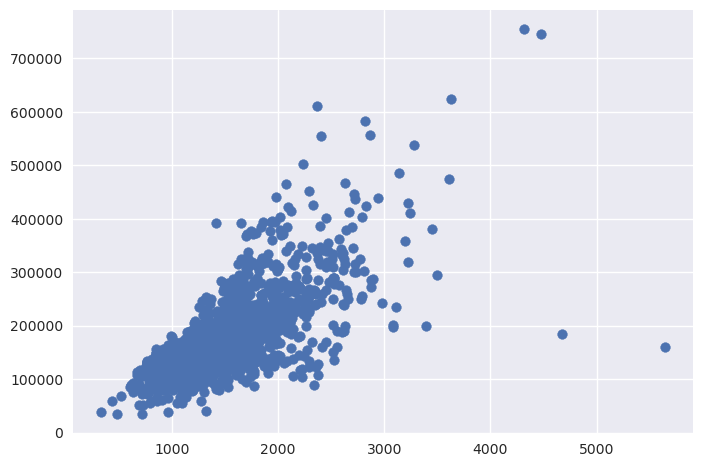

In [100]:
plt.scatter(x= 'GrLivArea', y='SalePrice', data = df_housePrice)

**clean outliers**

In [101]:
df_housePrice = df_housePrice.drop(df_housePrice[(df_housePrice['GrLivArea'] > 4000) | (df_housePrice['SalePrice'] > 700000)].index)

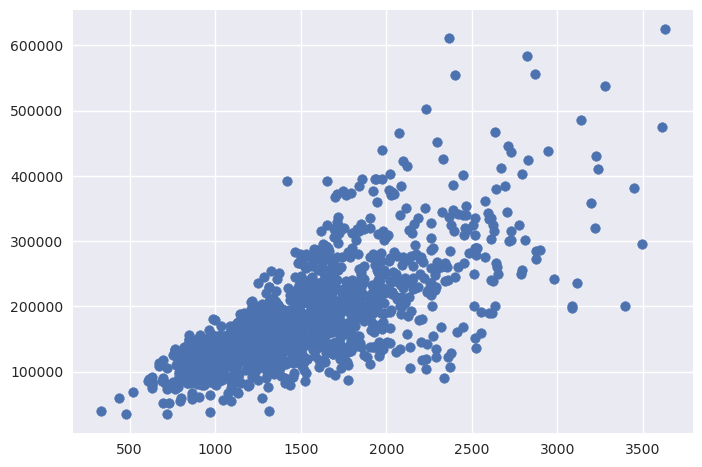

In [102]:
plt.scatter(x= 'GrLivArea', y='SalePrice', data = df_housePrice)

In [103]:
features = df_housePrice.drop('SalePrice',axis=1)
target = df_housePrice['SalePrice']
target_log=np.log(target)
X=features
X_train, X_test, y_train, y_test = train_test_split(X, target_log, test_size=0.3, random_state=42)
xStandardScaler = StandardScaler()
yStandardScaler = StandardScaler()
X_train = xStandardScaler.fit_transform(X_train)
X_test = xStandardScaler.transform(X_test)
y_train = yStandardScaler.fit_transform(y_train.ravel().reshape(-1, 1))
y_test = yStandardScaler.transform(y_test.ravel().reshape(-1, 1))

In [104]:
alphas = np.linspace(0,.1,num=21)
lgLasso = LassoCV(cv=10,alphas=alphas)
lgLasso.fit(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 48.818281978827144, tolerance: 0.08945385384224902
  positive,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:644: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coor

LassoCV(alphas=array([0.   , 0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 ,
       0.045, 0.05 , 0.055, 0.06 , 0.065, 0.07 , 0.075, 0.08 , 0.085,
       0.09 , 0.095, 0.1  ]),
        cv=10)

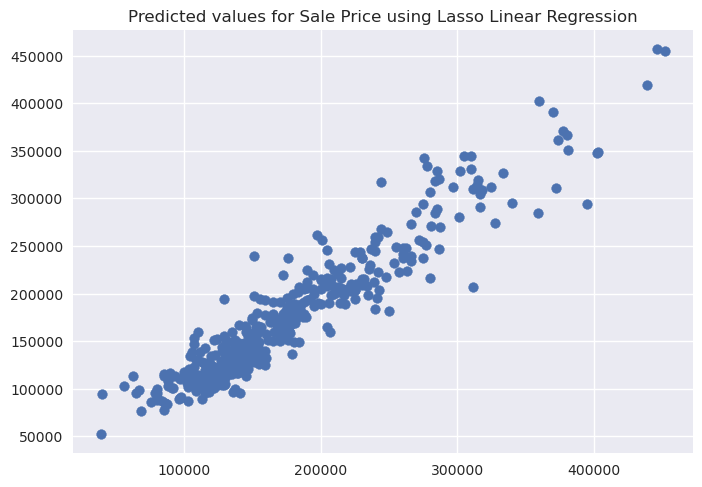

In [105]:
predictLinear_lasso = lgLasso.predict(X_test).reshape(-1, 1)
target_lasso=np.exp(yStandardScaler.inverse_transform(y_test))
predicted_lasso=np.exp(yStandardScaler.inverse_transform(predictLinear_lasso))
plt.scatter(target_lasso,predicted_lasso);
plt.title("Predicted values for Sale Price using Lasso Linear Regression");


In [106]:
evaluate_model('Lasso',y_test,predictLinear_lasso)

MAE: 17273.641353199415
MSE: 533246756.42675686
RMSE: 23092.136246496488


***by dropping 4 outliers we manage to improve the model from RMSE 28621 to RMSE 23092***

**lets apply this also on GradientBoost model**

In [107]:
df_housePrice2 = df_housePrice2.drop(df_housePrice2[(df_housePrice2['GrLivArea'] > 4000) | (df_housePrice2['SalePrice'] > 700000)].index)

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,


MAE: 16046.256005338715
MSE: 528953933.33328813
RMSE: 22998.998528920518


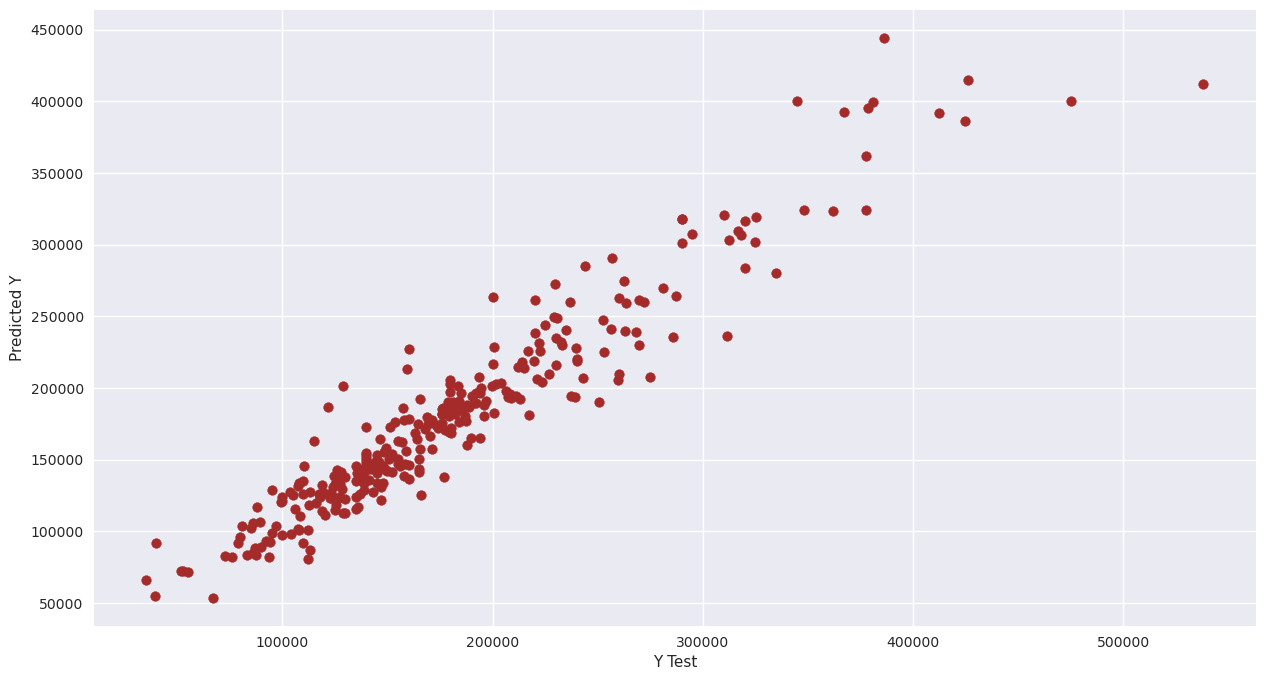

In [108]:
X_train, X_test, y_train, y_test = train_test_split(df_housePrice2.drop('SalePrice', axis=1), df_housePrice2['SalePrice'], test_size=0.2, random_state=101)
params = {'n_estimators': 210, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.09, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)

clf_pred=clf.predict(X_test)
#clf_pred= clf_pred.reshape(-1,1)

print('MAE:', metrics.mean_absolute_error(y_test, clf_pred))
print('MSE:', metrics.mean_squared_error(y_test, clf_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, clf_pred)))

plt.figure(figsize=(15,8))
plt.scatter(y_test,clf_pred, c= 'brown')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

***The RMSE of gradientBoost improved from 26648 to 22929***

**Lets check the test data with the new models**

In [109]:
X_testData = xStandardScaler.fit_transform(df_housePrice_test)
predictLinear_lasso = lgLasso.predict(X_testData).reshape(-1, 1)
predicted_lasso=np.exp(yStandardScaler.inverse_transform(predictLinear_lasso))

In [110]:
prediction= (0.8*clf_pred2)+(0.2*predicted_lasso[:,0])

In [111]:
sub = pd.DataFrame() 
sub['Id'] = test_ID   
sub['SalePrice'] = prediction
sub.to_csv('submission.csv',index=False) #submission file
sub.head()

,Id,SalePrice
0,1461,127222.621810
1,1462,159603.366493
2,1463,182334.579389
3,1464,192125.500673
4,1465,193827.564097


**SCORE:0.13911**

Although we managed to improve the prediction of our model in training, in the test we got less good results